<h1 style = "font-size:100px Solid"> Covid-19 Modelling Project By Aamir Ahmad Ansari</h1>
<h2 style = "font-size:100px Solid">Introduction</h2>
<p style = "font-size:10px Solid"> This report is prepared using Covid Data set Available on Kaggle for 4 Different Countries, who are:<ui id=1 style='list-style-type: circle;'><li>India</li><li>Italy</li><li>South Korea</li><li>Brzail</li></ui>
The main Aim to achieve with this project was to take decisions for Brazil from January'2020 while you have a chance to peek into the future with the data of the rest of the countries. All the datasets are shown on the right and can be downloaded or viewed on kaggle.
</p>
<p style = "font-size:10px Solid">
    This notebook is to be read from top to bottom as a report. It comprises of two parts:<ui id=2><li>Exploratory Data Analysis</li><li>Developing ML and AI models to predict Deaths in Brazil</li></ui></p>
<h3 style = "font-size:50pxSolid">1.Exploratory Data Analysis</h3>
<p>Exploratory Data Analysis is performed on each country with the intent to find valuable insights and trends that the data contain. There are embedded map graphs of which the code cannot be provided as they use MapBox API key which is unique to each member but a tutorial link will be provided. </p>
<h3 style = "font-size:40pxSolid">2.Developing ML and AI models to predict Deaths in Brazil</h3>
<p>In this section I developed 5 models:<ui id=1 style='list-style-type: circle;'><li>Linear Regression Model</li><li>Ridge Regression Model</li><li>Lasso Regression Model</li><li>KNN Regressor</li><li>MultiLayer Perceptron Model</li></ui> <br> for India and Italy to predict the death count. I compare all 5 them and choose the best form each country to work as a predictor for Brazil's Death Coun. This Project is asssigned by <a href=https://www.univ.ai>Univ.AI</a> and I am grateful to be a part of them and for the skills I have developed in the domain of Data Science so far.
</p>
   
    
    
    

<p>We'll start by importing all the necessary libraries. Pandas has been used to work with around and clean the datasets. MatplotLib, Plotly and Seaborn has been used for plottting all the graphs. Sklearn and Tensorflow are used for the developing models and features</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import tensorflow as tf 
from sklearn.linear_model import LinearRegression, Ridge,Lasso,RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import Normalizer


<h1 style = "background:black;border:0;height:65px;width:700px;padding-top:5px;color:white;font-size:50px;padding-left:7px">1. Exploratory Data Analysis</h1>

<h2 style = "background:black;border:0;height:55px;width:220px;padding-top:5px;color:white;font-size:45px;padding-left:7px">1.1 India</h2>

In [2]:
#Set the figure Size for the plots
plt.rcParams['figure.figsize']=(15,10)

In [3]:
pathIndia='/kaggle/input/covid19-in-india/'

India is a country of diversity and situated at the heart of Asian Continent, accounts for the second most populous country in Asia. Covid, like any other country treated India rough and a glimpse of it has been captured in the dataset below. The data comprises of 3 csv files:
<ui>
    <li> Covid 19 India: It contains daily records of Corona virus cases, deaths and curing of people from 20'Jan 2020 to 15'Aug 2021</li>
    <li> State wise Details: It contains daily records of Corona virus cases, deaths and curing of people from 20'Jan 2020 to 15'Aug 2021 divided statewise</li>
    <li> State wise Details: It contains details of the vaccination drill going on in India from Jan'21</li>
</ui>

In [4]:
ind=pd.read_csv(f'{pathIndia}covid_19_india.csv',parse_dates=True)
ind_test=pd.read_csv(f'{pathIndia}StatewiseTestingDetails.csv',parse_dates=True)
ind_vaccine=pd.read_csv(f'{pathIndia}covid_vaccine_statewise.csv',parse_dates=True)

In [5]:
ind.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
#Converting Dates to Datetime Object 
ind['Date']=pd.to_datetime(ind['Date'])

In [7]:
ind.dtypes
#Hence we confirm that the above operation succeeded or not

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

<p style='font-size:20px'>We start by initially getting a rough timeseries analysis for of the amount of cases and cured patients over the time. We do that by transforming our data frame as we sum the cases for each date and make the data more appropriate for timeseries analysis.</p>

In [8]:
time_series=ind.groupby('Date').sum()

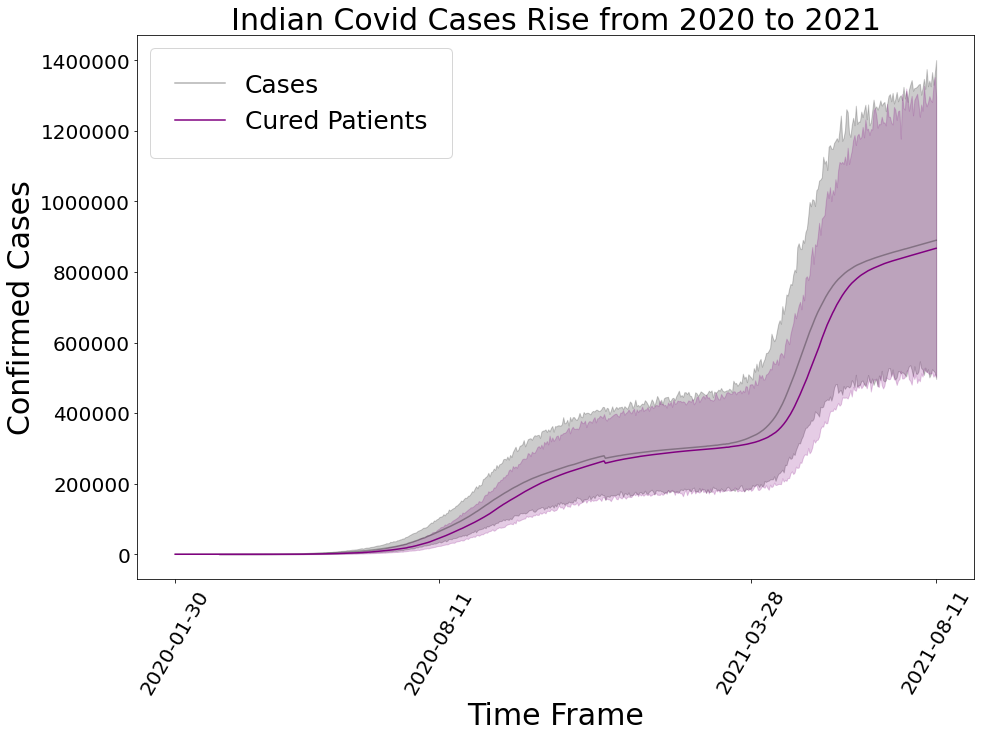

In [9]:
sns.lineplot(x='Date',y='Confirmed',data=ind,color='black',alpha=0.3)
sns.lineplot(x='Date',y='Cured',data=ind,color='purple')
plt.xlabel('Time Frame',fontsize=30)
plt.ylabel('Confirmed Cases',fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=60,ticks=['2020-01-30','2020-08-11','2021-03-28','2021-08-11'],fontsize=20)
plt.yticks(fontsize=20)
plt.title('Indian Covid Cases Rise from 2020 to 2021',fontsize=30)
plt.legend(labels=['Cases', 'Cured Patients'],loc=2,borderpad=1,fontsize=25)


> <p style='font-size:25px'>Corona Virus cases rose exponentially over the time but people got cured in approximately the same ratio. Note the solid lines are the average of the observations at each step and the cluster around it is the 95% confidence Interval.</p>

<p style ='font-size:20px'>We go deep and take a step forward in the time series analysis by checking the seasonality of the data by considering new feautres like Month and Day in our data</p>

In [10]:
#We create a datetime Index to access the datetime object, alterntively dt can be used
ind['Year']=pd.DatetimeIndex(ind['Date']).year
ind['Month']=pd.DatetimeIndex(ind['Date']).month
ind['Day']=pd.DatetimeIndex(ind['Date']).day

In [11]:
#Verification of our changes 
ind.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,1,30
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,1,31
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,2,1
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,2,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020,2,3


<p style='font-size:20px'> The proposed idea for this analysis is to observe the trend of both the years seperately. We start by visualizing the monthly trend for 2020 and then we move onto 2021</p>

Text(0.5, 1.0, 'Monthly Case Rise from 2020')

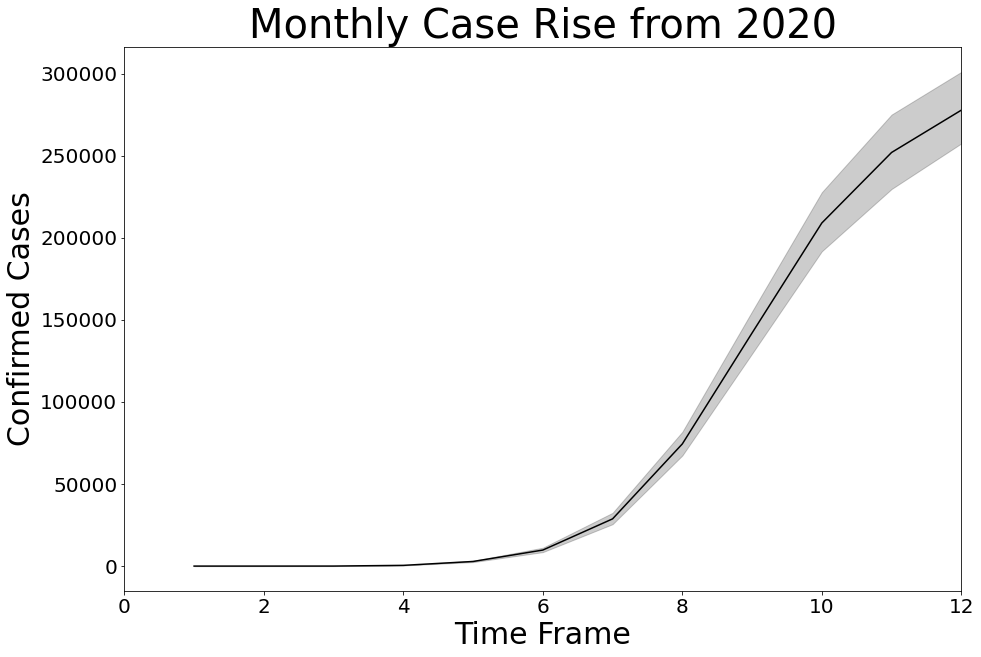

In [12]:
#Get Data of the year 2020
ind_2020=ind.where(ind['Date'].dt.year==2020)
#Plotting the timeseries graph
sns.lineplot(x='Month',y='Confirmed',data=ind_2020,color='black')
plt.xlabel('Time Frame',fontsize=30)
plt.ylabel('Confirmed Cases',fontsize=30)
plt.xlim(0,12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Monthly Case Rise from 2020',fontsize=40)


><p style='font-size:25px'> It can be clearly seen that the beggining of the year registered the lowest cases untill June when it started to rise rapidly. The summer season is in flow by then. The initial months of the winter season have seen the greatest number of cases registered, in the year.</p>

Text(0.5, 1.0, 'Monthly Case Rise from 2021')

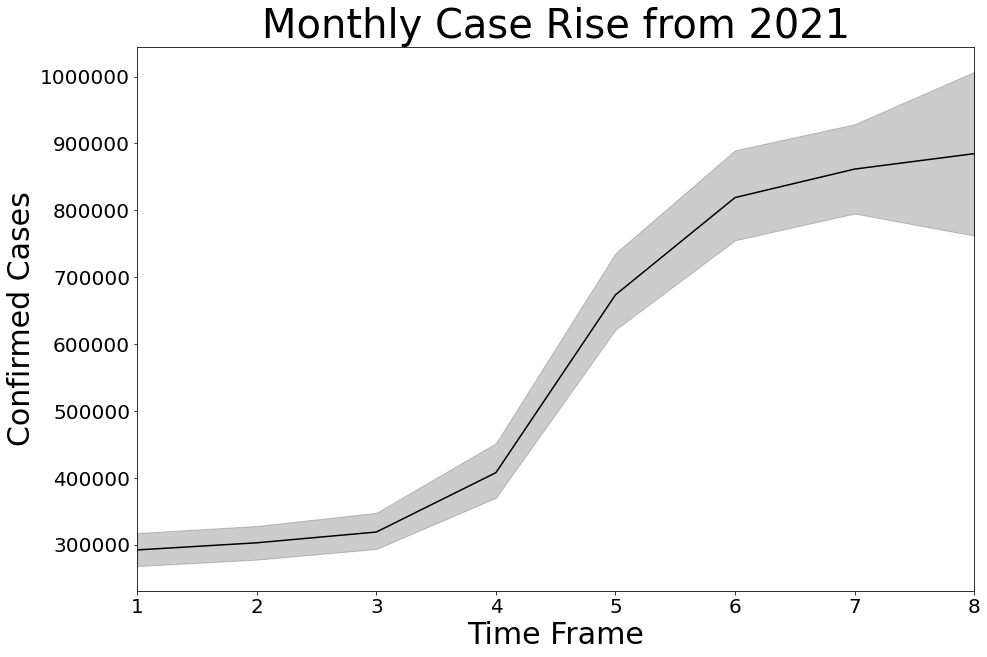

In [13]:
# For the year 2021
ind_2021=ind.where(ind['Date'].dt.year==2021)
sns.lineplot(x='Month',y='Confirmed',data=ind_2021,color='black')
plt.xlabel('Time Frame',fontsize=30)
plt.ylabel('Confirmed Cases',fontsize=30)
plt.xlim(1,8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Monthly Case Rise from 2021',fontsize=40)


><p style='font-size:25px'> A similar trend can be seen in 2021, where the initial months registers low number of cases as compared to the penultimate and ending months of the year. A difference that can be noticed is that in 2020 June was the month where cases started to rise and in 2021 the cases has been rising almost linearly from the start </p>

<p style='font-size:20px'> Moving forward, we'll now look at the state wise distributions of cases, deaths and curation in both the years; 2020 and 2021. Histograms is the opted visulaiization for this analysis. We prepare our data by grouping by states and union teritorry column <b>State/UnionTerritory</b>.

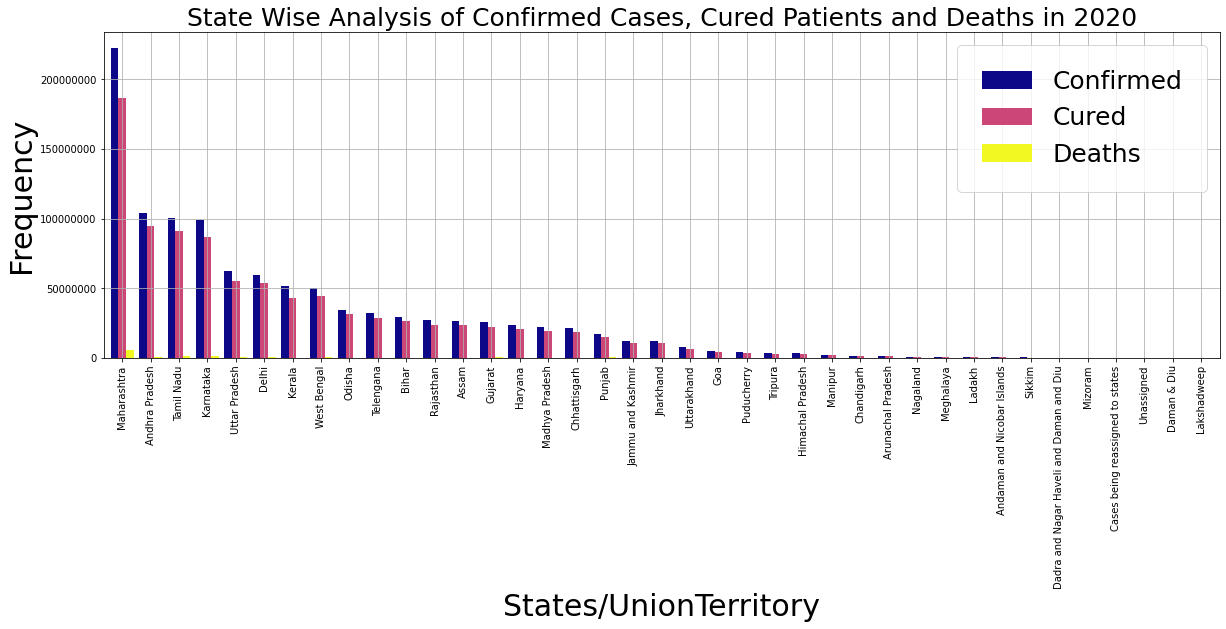

In [14]:
#Monthly Statewise Cases, Deaths, Cure
monthly=ind_2020.groupby('State/UnionTerritory').sum().sort_values('Confirmed',ascending=False)
monthly[['Confirmed','Cured','Deaths']].plot(kind='bar',colormap='plasma',grid=True,figsize=(20,6),title='State Wise Analysis of Confirmed Cases, Cured Patients and Deaths', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States/UnionTerritory', fontsize=30)
plt.title('State Wise Analysis of Confirmed Cases, Cured Patients and Deaths in 2020',fontsize=25)
plt.legend(loc=0,borderpad=1,fontsize=25)


> <p style='font-size:25px'> It can be noticed that the five most affected states in 2020 are:<ui><li style='font-size:25px'>Maharashtra</li><li style='font-size:25px'>Andhra Pradesh</li><li style='font-size:25px'>Tamil Nadu</li><li style='font-size:25px'>Karnataka</li><li style='font-size:25px'>UttarPradesh</li></ui></p>

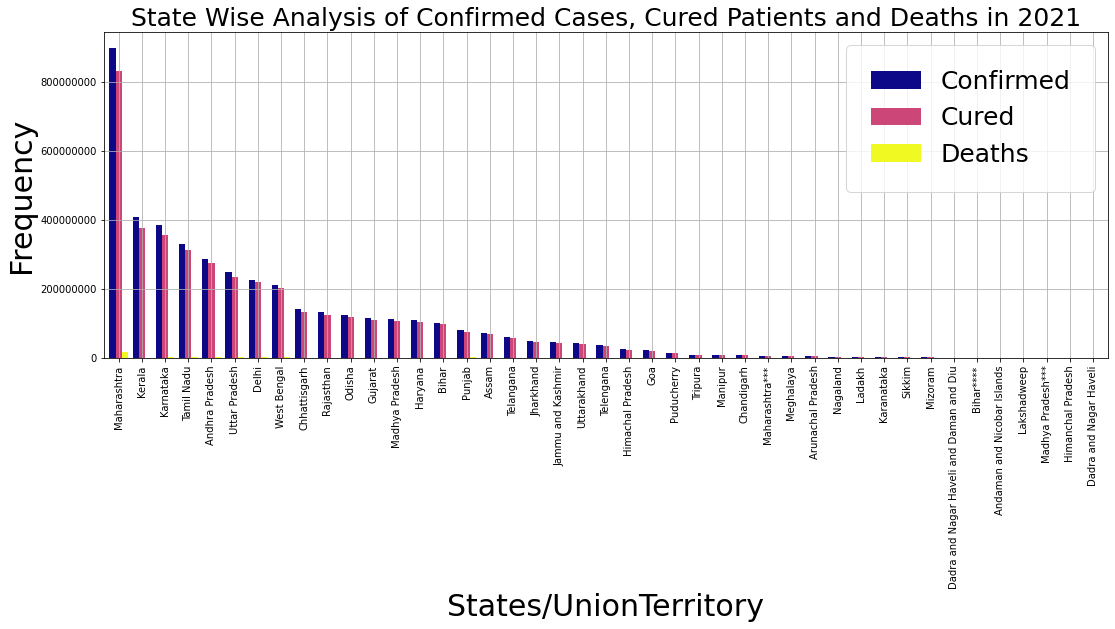

In [15]:
#Monthly Statewise Cases, Deaths, Cure

monthly=ind_2021.groupby('State/UnionTerritory').sum().sort_values('Confirmed',ascending=False)
monthly[['Confirmed','Cured','Deaths']].plot(kind='bar',colormap='plasma',grid=True,figsize=(18,6),title='Statwesise Analysis of Confirmed Cases, Cured Patients and Deaths', xlabel= 'States', ylabel='Frequency',width=0.8)
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Frequency', fontsize=30)
plt.xlabel('States/UnionTerritory', fontsize=30)
plt.title('State Wise Analysis of Confirmed Cases, Cured Patients and Deaths in 2021',fontsize=25)
plt.legend(loc=0,borderpad=1,fontsize=25)

> <p style='font-size:25px'> It can be noticed that the five most affected states in 2021 are:<ui><li style='font-size:25px'>Maharashtra</li><li style='font-size:25px'>Kerala</li><li style='font-size:25px'>Karnataka</li><li style='font-size:25px'>Tamil Nadu</li><li style='font-size:25px'>UttarPradesh</li></ui></p>
> <p style='font-size:25px'>The rise of Kerala in the ranks can be viewed as carelessness towards precautions by government and the people.</p>

<p style='font-size:20px'>The next step will be to get a clear view our initial timeseries analysis and plot it better with 7 day average taken in Consideration. We plot it for the India and it's two states: Maharashtra(as it has the highest numeber of registered cases) and Kerala(the new comers in 2021). We extracrt the data for the state or the whole nation and add a new feature <b>7DayAvg</b> to our dataset.</p>

In [16]:
# This function calculates the 7 Day average cases for a particular day 
def compute_7_day(df,column):
    n=len(df)-1
    t=0
    avg=[]
    while True:
        if t==n+1:
            break
        if t+6<n:
            average=np.round(df.iloc[t:t+6].mean()[column])
            avg.append(average)
        else:
            end=n-t
            average=np.round(df.iloc[end:n].mean()[column])
            avg.append(average)
        t+=1
    return avg

            
        
    

In [17]:
#We kick-off with Kerala
kerala=ind.where(ind['State/UnionTerritory']=='Kerala')
kerala.dropna(inplace=True)
kerala.set_index('Date',inplace=True)
kerala['7DayAvg']=compute_7_day(kerala,'Confirmed')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [18]:
#Verifing our Changes 
kerala.head(5)

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day,7DayAvg
Date,,,,,,,,,,,,
2020-01-30,1.0,6:00 PM,Kerala,1,0,0.0,0.0,1.0,2020.0,1.0,30.0,2.0
2020-01-31,2.0,6:00 PM,Kerala,1,0,0.0,0.0,1.0,2020.0,1.0,31.0,2.0
2020-02-01,3.0,6:00 PM,Kerala,2,0,0.0,0.0,2.0,2020.0,2.0,1.0,3.0
2020-02-02,4.0,6:00 PM,Kerala,3,0,0.0,0.0,3.0,2020.0,2.0,2.0,3.0
2020-02-03,5.0,6:00 PM,Kerala,3,0,0.0,0.0,3.0,2020.0,2.0,3.0,3.0


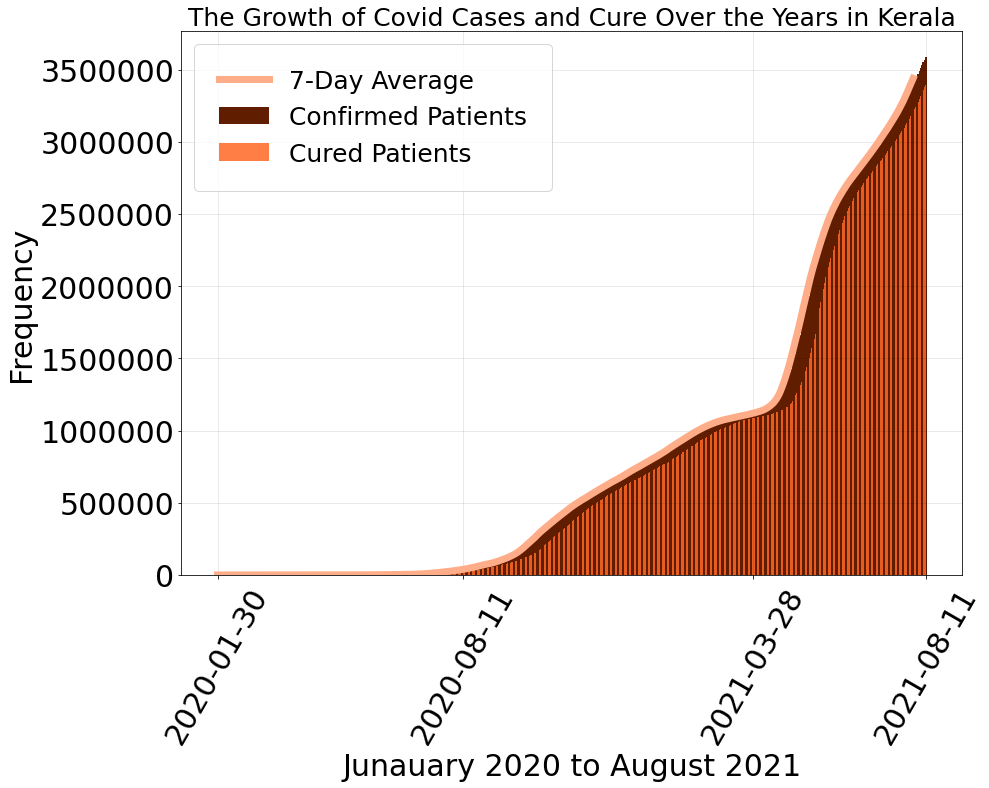

In [19]:
#plotting for Kerala
fig,ax=plt.subplots(figsize=(14,10))
# kerala.Confirmed.plot(kind='bar')
ax.bar(kerala.index,kerala['Confirmed'],width=1.5,color='#611d00',alpha=1,label='Confirmed Patients')
ax.bar(kerala.index,kerala['Cured'],width=0.5,color='#ff6826',alpha=0.85,label='Cured Patients')
ax.plot(kerala.index[0:550],kerala['7DayAvg'].iloc[0:550],color='#ffac88',linewidth=7,label='7-Day Average')
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Junauary 2020 to August 2021', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.title('The Growth of Covid Cases and Cure Over the Years in Kerala',fontsize=25)
plt.xticks(ticks=['2020-01-30','2020-08-11','2021-03-28','2021-08-11'],rotation=60,fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=2,borderpad=1,fontsize=25)

><p style='font-size:25px'> The time series graph above verifies our statewise results about kerala, the rapid growth being in 2021.</p>

In [20]:
#We do the same for Maharashtara
mh=ind.where(ind['State/UnionTerritory']=='Maharashtra')
mh.dropna(inplace=True)
mh.set_index('Date',inplace=True)
mh['7DayAvg']=compute_7_day(mh,'Confirmed')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [21]:
#Verification of Our Changes
mh.head(5)

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Year,Month,Day,7DayAvg
Date,,,,,,,,,,,,
2020-03-09,77.0,6:00 PM,Maharashtra,2,0,0.0,0.0,2.0,2020.0,3.0,9.0,8.0
2020-03-10,92.0,6:00 PM,Maharashtra,5,0,0.0,0.0,5.0,2020.0,3.0,10.0,13.0
2020-03-11,98.0,6:00 PM,Maharashtra,2,0,0.0,0.0,2.0,2020.0,3.0,11.0,18.0
2020-03-12,121.0,6:00 PM,Maharashtra,11,0,0.0,0.0,11.0,2020.0,3.0,12.0,24.0
2020-03-13,134.0,6:00 PM,Maharashtra,14,0,0.0,0.0,14.0,2020.0,3.0,13.0,29.0


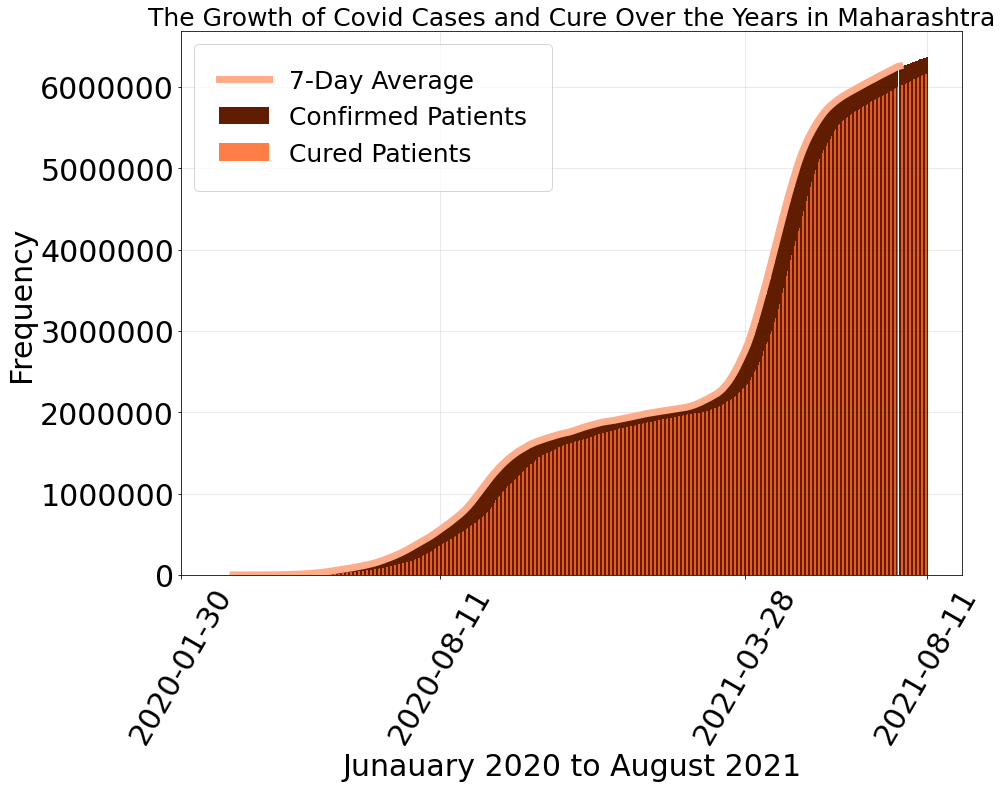

In [22]:
#Plotting time series for Maharashrta
fig,ax=plt.subplots(figsize=(14,10))
ax.bar(mh.index,mh['Confirmed'],width=1.5,color='#611d00',alpha=1,label='Confirmed Patients')
ax.bar(mh.index,mh['Cured'],width=0.5,color='#ff6826',alpha=0.85,label='Cured Patients')
ax.plot(mh.index[0:500],mh['7DayAvg'].iloc[0:500],color='#ffac88',linewidth=7,label='7-Day Average')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Junauary 2020 to August 2021', fontsize=30)
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ylabel('Frequency', fontsize=30)
plt.title('The Growth of Covid Cases and Cure Over the Years in Maharashtra',fontsize=25)
plt.xticks(ticks=['2020-01-30','2020-08-11','2021-03-28','2021-08-11'],rotation=60,fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=2,borderpad=1,fontsize=25)

><p style='font-size:25px'> The cases in Maharashtra have been twice as many as any state in India despite of the cautionful early lockdowns, the state suffered alot. The only positive here is that people got cured in almost the same proportion</p>

<p style='font-size:20px'>After Doing it for the above states, we would like to visualize it for the whole nation.</p>

In [23]:
#Anaysis on India
ind1=ind.dropna()
ind1.set_index('Date',inplace=True)
ind1['7DayAvg']=compute_7_day(ind1,'Confirmed')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [24]:
#we transform our dataset for time series analysis
ind1_dates=ind1.groupby('Date').sum()

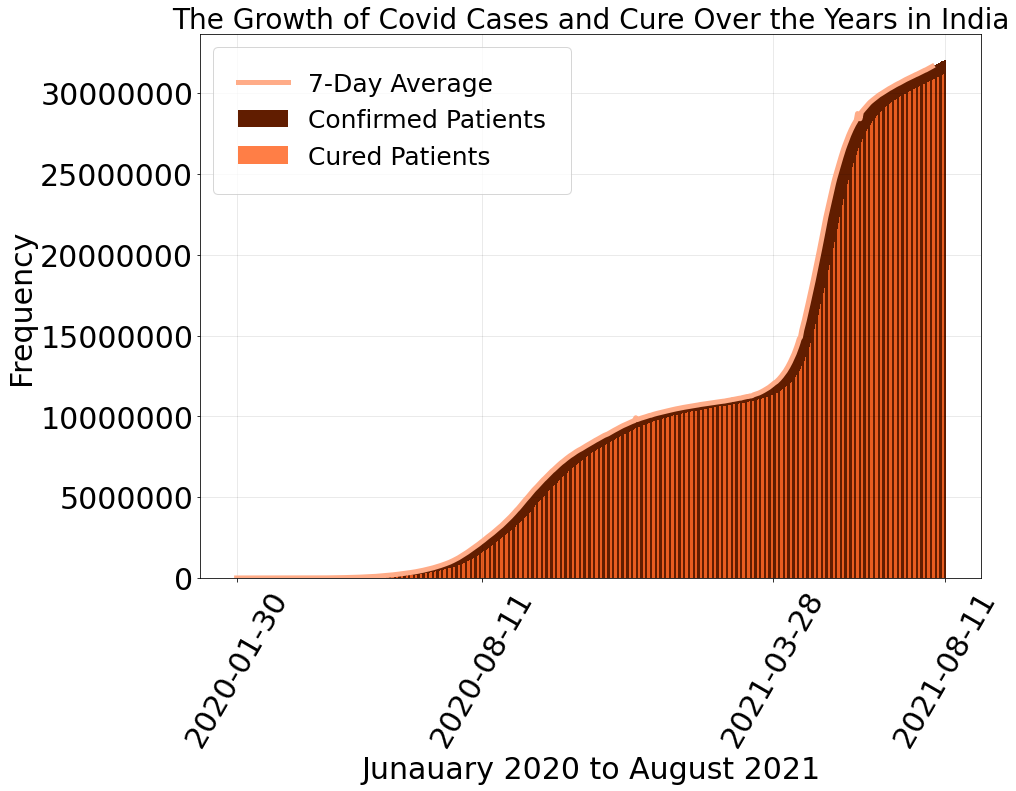

In [25]:
fig,ax=plt.subplots(figsize=(14,10))
ax.bar(ind1_dates.index,ind1_dates['Confirmed'],width=1.5,color='#611d00',alpha=1,label='Confirmed Patients')
ax.bar(ind1_dates.index,ind1_dates['Cured'],width=0.5,color='#ff6826',alpha=0.85,label='Cured Patients')
ax.plot(ind1_dates.index[0:550],ind1_dates['7DayAvg'].iloc[0:550],color='#ffac88',linewidth=5,label='7-Day Average')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Junauary 2020 to August 2021', fontsize=30)
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ylabel('Frequency', fontsize=30)
plt.title('The Growth of Covid Cases and Cure Over the Years in India',fontsize=28)
plt.xticks(ticks=['2020-01-30','2020-08-11','2021-03-28','2021-08-11'],rotation=60,fontsize=30)
plt.yticks(fontsize=30)

plt.legend(loc=2,borderpad=1,fontsize=25)

<p style='font-size:20px'>We step ahead to look at the days that registered the highest number of cases throught the span of these 2 years. The trend seen above drives us to the conclusion that they will be form 2021. </p>

In [26]:
#Day of the highest number of cases recorded
ind1_dates.sort_values('Confirmed',ascending=False)['Confirmed'].iloc[:5]

Date
2021-08-11    32036511
2021-08-10    31998158
2021-08-09    31969954
2021-08-08    31934455
2021-08-07    31895385
Name: Confirmed, dtype: int64

><p style='font-size:25px'>The whole month of August for which we have data for saw an increasing trend of cases and hence the above result. 11'Aug 2021 the last date for which data is present and also we had the highest number of cases there. In the next step we look at the deaths trend in our data set an intresting thing found was that the trend is similar as seen already in the rise of cases over the year.  </p>

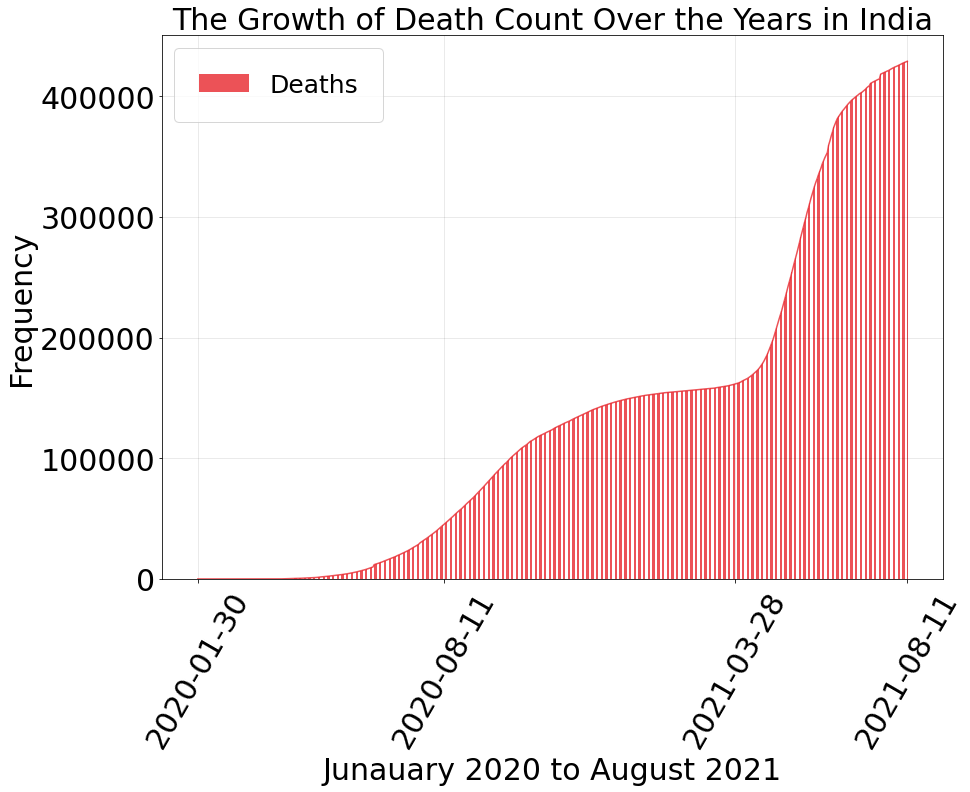

In [27]:
# Trend for Deaths in Covid 
fig,ax=plt.subplots(figsize=(14,10))
ax.bar(ind1_dates.index,ind1_dates['Deaths'],width=0.5,color='#e9343a',alpha=0.85,label='Deaths')
ax.plot(ind1_dates.index,ind1_dates['Deaths'],color='#e9343a',alpha=0.85,)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Junauary 2020 to August 2021', fontsize=30)
ax.grid(True,color='black',linestyle='-',alpha=0.1)
plt.ylabel('Frequency', fontsize=30)
plt.title('The Growth of Death Count Over the Years in India',fontsize=30)
plt.xticks(ticks=['2020-01-30','2020-08-11','2021-03-28','2021-08-11'],rotation=60,fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc=2,borderpad=1,fontsize=25)

<p style='font-size:20px'> The Vaccination came as a blessing in disguise for the whole world. There were many different vaccination developed across the world but in India majorly 3 were used, namely: Covishield; The oxford developed vaccine, Covaxin; India's first indegenious vaccine and the Russian vaccine Sputnik V. We will explore our data set to find the patterns. </p>

In [28]:
### VACCINATION DATASET SNEAK PEEK### 

ind_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [29]:
#Shape of Our Data 
ind_vaccine.shape

(7845, 24)

In [30]:
#Alot of null values, let's see which columns contain them and how many
ind_vaccine.isna().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

> <p style='font-size:25px'> Almost every column in our data set contains null values. Luckily all of them are numerical columns and hence we can fill them together and with zero so that we can use all our data and we do not loose information as the data set is fairly small with only 7845 data points.</p>

In [31]:
#Treat Nan Values 
ind_vaccine.fillna(0,inplace=True)
#Verify the changes
ind_vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,98111.0,153145.0,24.0,251280.0


In [32]:
# To create consistency over data sets we use Date as the default name 
ind_vaccine.rename(columns={'Updated On':'Date'},inplace=True)

In [33]:
# To prepare our data for timeseries analysis we take the date column as index and also first transform it into a datetime object 
vac=ind_vaccine
vac['Date']=pd.to_datetime(vac['Date'])
vac.set_index('Date',inplace=True)

In [34]:
# we merge our data set with the covid datset used before to get a collective analysis 
merge=pd.merge(left=vac,right=ind1_dates,how='inner',on='Date')

In [35]:
merge.head()

,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),...,Transgender(Individuals Vaccinated),Total Individuals Vaccinated,Sno,Cured,Deaths,Confirmed,Year,Month,Day,7DayAvg
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,0.0,0.0,0.0,579.0,...,2.0,48276.0,383058,10179715,152093,10542841,72756,36,576,10542997.0
2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,...,0.0,23.0,383058,10179715,152093,10542841,72756,36,576,10542997.0
2021-01-16,Andhra Pradesh,4216.0,541.0,339.0,4216.0,0.0,857.0,3359.0,0.0,0.0,...,0.0,4216.0,383058,10179715,152093,10542841,72756,36,576,10542997.0
2021-01-16,Arunachal Pradesh,81.0,10.0,9.0,81.0,0.0,40.0,41.0,0.0,0.0,...,0.0,81.0,383058,10179715,152093,10542841,72756,36,576,10542997.0
2021-01-16,Assam,401.0,79.0,64.0,401.0,0.0,141.0,260.0,0.0,36.0,...,0.0,401.0,383058,10179715,152093,10542841,72756,36,576,10542997.0


<p style='font-size:20px'> Notice that the data for vaccines is available from 16'Jan 2021 and we 6.5k plus records for this collective analysis. We are analysing the timeseries graph for first and secod doses in India and then we move on to seeing the impact of vaccination on India.</p>

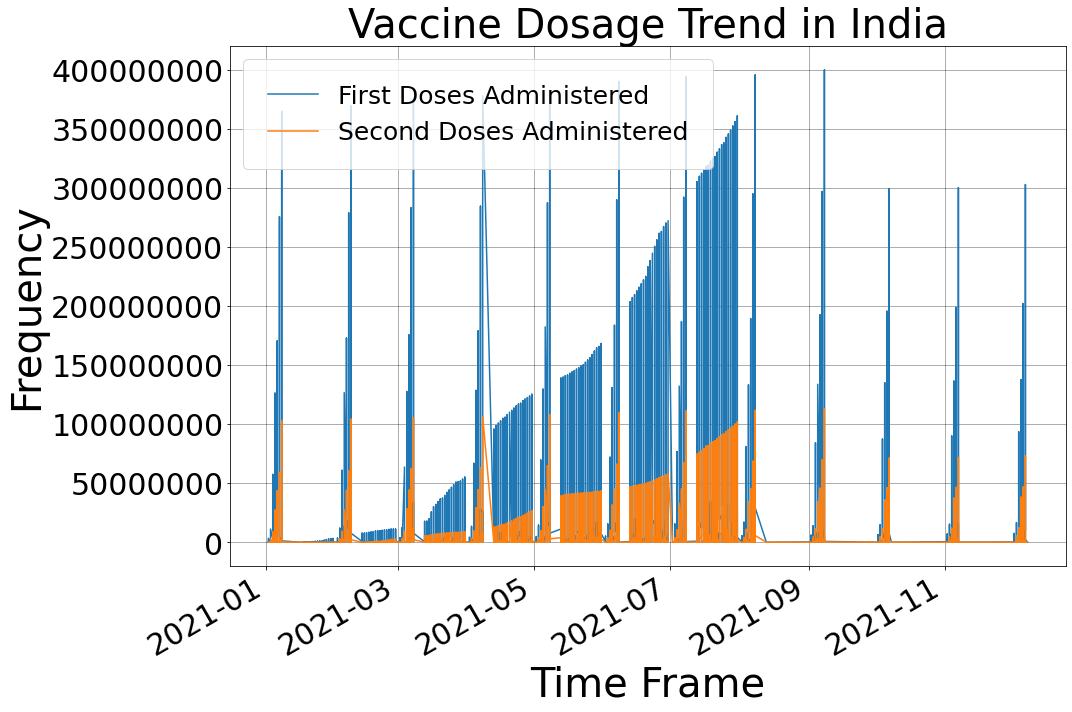

In [36]:
# vac['Total Doses Administered'].plot(kind='line',label='Total Doses Administered')
vac['First Dose Administered'].plot(kind='line',label='First Doses Administered')
vac['Second Dose Administered'].plot(kind='line',label='Second Doses Administered')

plt.xlabel('Time Frame',fontsize=40, color='black',)
plt.ylabel('Frequency',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title('Vaccine Dosage Trend in India',fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)

plt.tight_layout()





> <p style='font-size:25px'> The graph above depicts the 11 month journey of vaccination in India. The first dose is administered at a very high scale but the second doses are have not been administered at the same rate, as we move on we'll see the reason behind low rates for second dose</p>

<p style='font-size:20px'> Remember we created a collective dataset, now we will use it. We wanted to see that how the vaccine is working and with the available data we chose to look at the number of people cured with and without vaccine.</p>

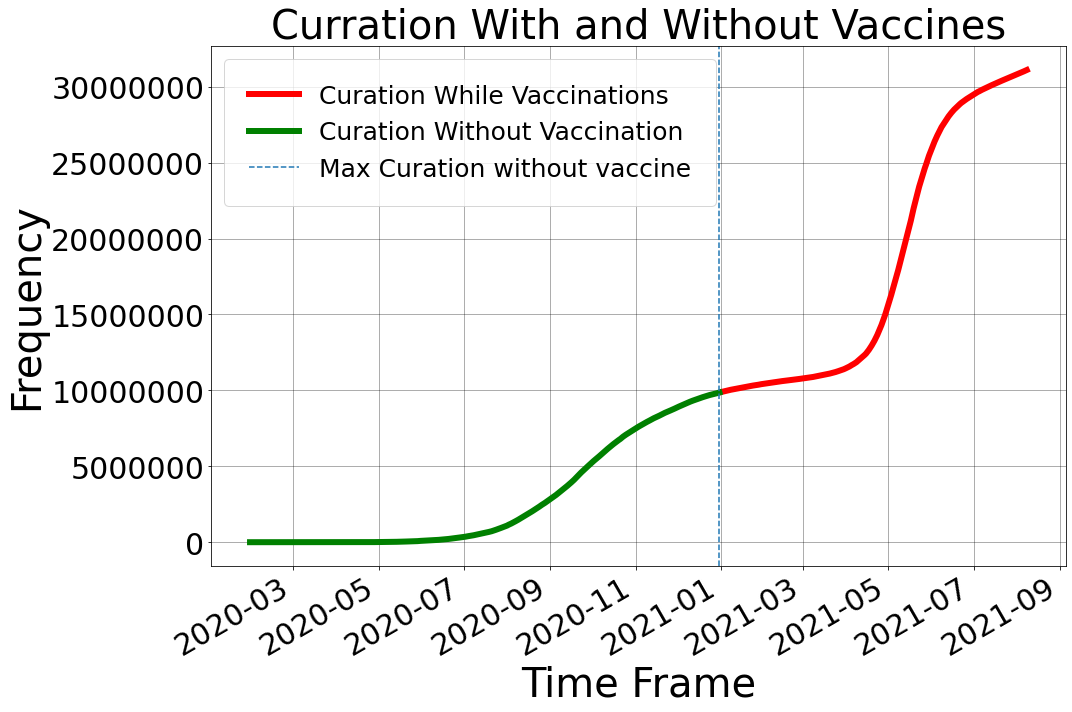

In [37]:
merge['Cured'].plot(kind='line',label='Curation While Vaccinations',linewidth=6,color='r')
ind1_dates['2020-01-30':'2020-12-31']['Cured'].plot(kind='line',label='Curation Without Vaccination',linewidth=6,color='g')
plt.axvline('2020-12-31',label='Max Curation without vaccine',linestyle='--')
plt.xlabel('Time Frame',fontsize=40, color='black',)
plt.ylabel('Frequency',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title('Curration With and Without Vaccines',fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()

><p style='font-size:25px'>The number of cured patients increased rapidly in the time vaccination was present and applied. Ofcourse other factor also affects this graph but you can not deny the part that vaccination has played here.</p>

<p style='font-size:20px'> Now that we have verified the impact of the vaccines on people of India let's see how many doeses did get administered in the time span of 9 months and which vaccines are used in India. </p>

In [38]:
#Transforming Data Frame to get Inidian Vaccine Information
total_vaccines=vac.where(vac['State']=='India')

In [39]:
#Dropping observations where the number of Sessions are 0 
total_vaccines=total_vaccines.where(total_vaccines['Sessions']!=0).dropna()
total=total_vaccines.sort_values('Total Doses Administered',ascending=False).iloc[0]
total

State                                        India
Total Doses Administered               513228400.0
Sessions                                21978176.0
 Sites                                     46163.0
First Dose Administered                400150406.0
Second Dose Administered               113077994.0
Male (Doses Administered)              270163622.0
Female (Doses Administered)            239518609.0
Transgender (Doses Administered)           98275.0
 Covaxin (Doses Administered)           62367416.0
CoviShield (Doses Administered)        446825051.0
Sputnik V (Doses Administered)            588039.0
AEFI                                       26542.0
18-44 Years (Doses Administered)       224330364.0
45-60 Years (Doses Administered)       166757453.0
60+ Years (Doses Administered)         118692689.0
18-44 Years(Individuals Vaccinated)            0.0
45-60 Years(Individuals Vaccinated)            0.0
60+ Years(Individuals Vaccinated)              0.0
Male(Individuals Vaccinated)   

> <p style='font-size:25px'>This gives an index of the vaccine process in India and we can use this later when we decide things for Brazil.<ui><li style='font-size:25px'>More than 513.2 Million Vaccines were administered in India with help of 46163 vaccinations sites.</li><li style='font-size:25px'>  400 Million people got their fisrt doese while a fourth of them got fully vaccinated.</li><li style='font-size:25px'> The sex ratio came out to be 1.2; For every one women 1.2 men got vaccinated.</li><li style='font-size:25px'>The age bracket 18-44 registered the most number of recipients of the vaccine</li><li style='font-size:25px'>The most used vaccine was Covishield, the Oxford prepared drug was India's choice.</li></ui></p>

In [40]:
#Stripping white spaces from the series Index. Also I will recommend you tom use Camel Case Indexes instead>
total.index=list(map(lambda x:x.strip(),total.index))

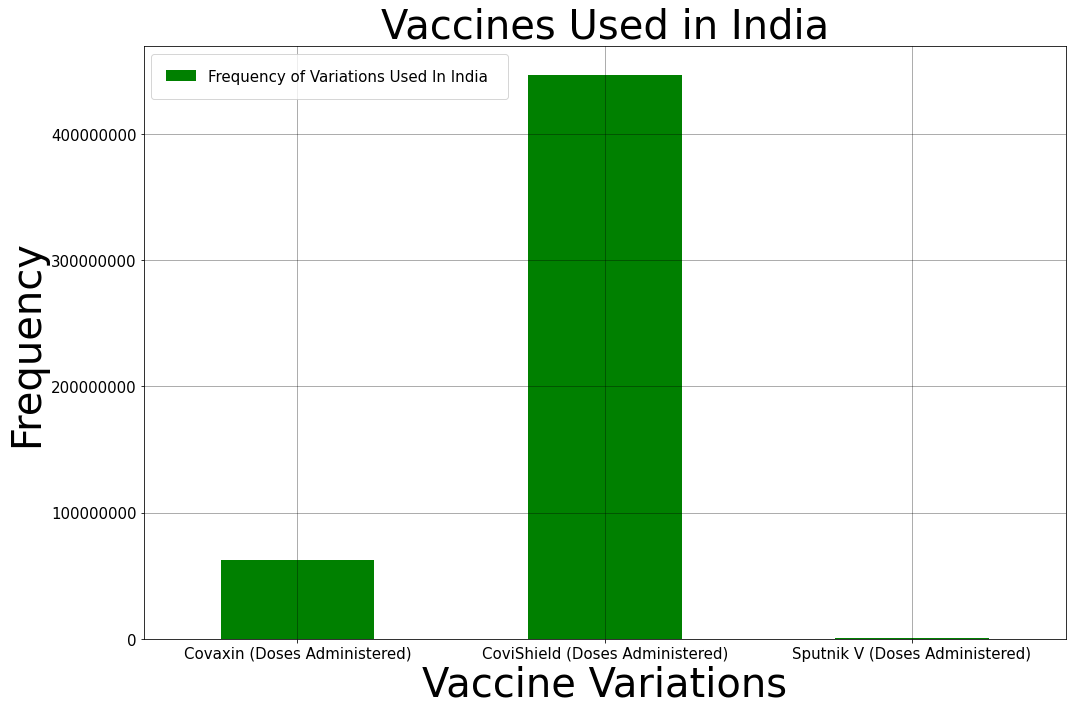

In [41]:
total.loc['Covaxin (Doses Administered)':'Sputnik V (Doses Administered)'].plot(kind='bar',label='Frequency of Variations Used In India ',width=0.5,color='g')
plt.xlabel('Vaccine Variations',fontsize=40, color='black',)
plt.ylabel('Frequency',fontsize=40, color='black')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title('Vaccines Used in India',fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=15)
plt.tight_layout()

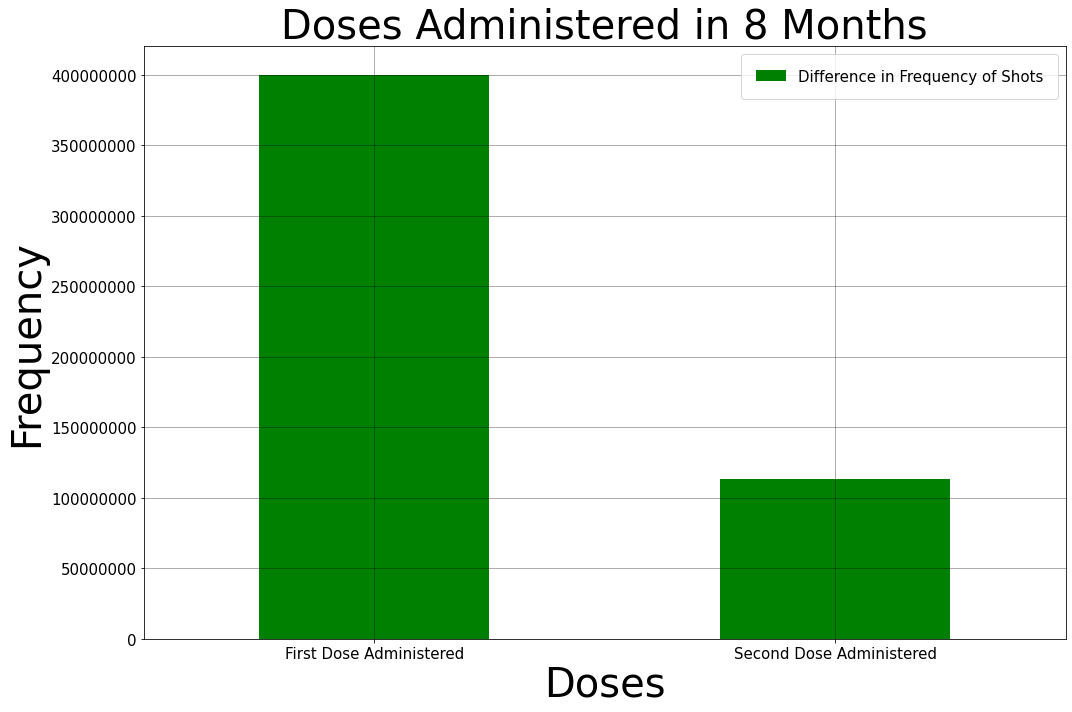

In [42]:
#Number of Doses Administered 
total.loc['First Dose Administered':'Second Dose Administered'].plot(kind='bar',label='Difference in Frequency of Shots',width=0.5,color='g')
plt.xlabel('Doses',fontsize=40, color='black',)
plt.ylabel('Frequency',fontsize=40, color='black')
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title('Doses Administered in 8 Months',fontsize=40, color='black')
plt.legend(loc=0,borderpad=1,fontsize=15)
# plt.ylim(0,60000000000)
plt.tight_layout()

<h2 style = "background:black;border:0;height:55px;width:360px;padding-top:5px;color:white;font-size:45px;padding-left:7px">1.1.1 Conclusion</h2>

> <p style='font-size:25px'>From the above analysis, we can conclude that:.<ui><li style='font-size:25px'>Even after early lockdowns that took place in India, Covid-19 couldn't be controlled.</li><li style='font-size:25px'>Vaccination did had impact in curing people but the rate of fully vaccinated people was low.</li><!--><li style='font-size:25px'> The sex ratio came out to be 1.2; For every one women 1.2 men got vaccinated.</li><li style='font-size:25px'>The age bracket 18-44 registered the most number of rexipients of the vaccine</li><li style='font-size:25px'>The most used vaccine was Covishield, the Oxford prepared drug was India's choice.</li></ui></p>

<h2 style = "background:black;border:0;height:55px;width:220px;padding-top:5px;color:white;font-size:45px;padding-left:7px">1.2 Italy</h2>

In [43]:
# A variable is there to make our lives easy, right?
pathItaly='/kaggle/input/covid19-in-italy/'

<p style='font-size:20px'>A beautiful European country that experienced its worst nightmare in Covid-19, Italy. We have two datsets for this country, one contains the data for each province in Italy and the other one contains detailed information on covid cases according to their region </p>

In [44]:
#The first dataset
ita_province=pd.read_csv(f'{pathItaly}covid19_italy_province.csv',parse_dates=True)

In [45]:
ita_province.head()

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0


In [46]:
#Check for Nan values 
ita_province.isna().sum()

SNo                        0
Date                       0
Country                    0
RegionCode                 0
RegionName                 0
ProvinceCode               0
ProvinceName               0
ProvinceAbbreviation    9779
Latitude                9492
Longitude               9492
TotalPositiveCases         0
dtype: int64

><p style='font-size:25px'>The data contains null values, both numerical and string. We'll start by filling the string column ProvinceAbbreviation which has short names for each province, we propose to fill these values as unknown 'UK' rather than dropping this information.</p>

In [47]:
ita_province.ProvinceAbbreviation.fillna('UK',inplace=True)

In [48]:
#The rest of the data is numerical columns so we can just place 0 there
ita_province.fillna(0,inplace=True)

<p style='font-size:20px'>Let's do something fancy now, we'll create a map graph and see cases on a geographical map. We start by preparing our data and we choose the provinces where we have information of latitudes and lattitudes.</p>

In [49]:
new=ita_province[ita_province['Latitude']!=0]
total_cases=new.groupby('ProvinceAbbreviation')['TotalPositiveCases'].sum()
#The group by dataframe indexes are the province names which we will require later so convert it back into a column
total_cases_df=total_cases.to_frame().reset_index()


In [50]:
# Here we merge both the datasets created above 
merge_df=pd.merge(left=total_cases_df, right=new,on='ProvinceAbbreviation')

In [51]:
# We keep the first value for data and rest drop all the copy provinces 
map_data=merge_df.drop_duplicates(subset=['ProvinceAbbreviation'])

In [52]:
map_data.head(5)

,ProvinceAbbreviation,TotalPositiveCases_x,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,Latitude,Longitude,TotalPositiveCases_y
0,AG,124563,97,2020-02-24T18:00:00,ITA,19,Sicilia,84,Agrigento,37.309711,13.584575,0
287,AL,1280823,77,2020-02-24T18:00:00,ITA,1,Piemonte,6,Alessandria,44.912974,8.615401,0
574,AN,687826,60,2020-02-24T18:00:00,ITA,11,Marche,42,Ancona,43.616760,13.518875,0
861,AO,469598,118,2020-02-24T18:00:00,ITA,2,Valle d'Aosta,7,Aosta,45.737503,7.320149,0
1148,AP,205392,62,2020-02-24T18:00:00,ITA,11,Marche,44,Ascoli Piceno,42.853223,13.576911,0


<p style='font-size:20px'> Now that we have our data ready we will plot this graph with plotly and we will get the map background from <a href=https://account.mapbox.com>MapBox API</a>. As this requires and API access token and for higher traffic it is paid.</p>

In [53]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("MB")
px.set_mapbox_access_token(secret_value_0)
fig = px.scatter_mapbox(map_data, hover_name='ProvinceAbbreviation', lat="Latitude", lon="Longitude", size="TotalPositiveCases_x", color="TotalPositiveCases_x",color_continuous_scale=px.colors.sequential.Plasma_r, size_max=50, zoom=2)
fig.update_layout(mapbox_style="dark")

<p style='font-size:20px'>Feel free to hover over and zoom to check the cases by province. The size of the bubbles depend on the total number of cases in a Province as well as the colors. Next up is Analysis on Region Data</p>

In [54]:
ita_region=pd.read_csv(f'{pathItaly}covid19_italy_region.csv',parse_dates=True)

In [55]:
ita_region.head(5)

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,NaN


In [56]:
#Null values Exploration
ita_region.isna().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [57]:
#Only test performed has null values we remove them by 
ita_region.fillna(0,inplace=True)

In [58]:
#Verification of Changes
ita_region.isna().sum()

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

In [59]:
# We again peek at our data set 
ita_region.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0.0
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0.0
2,2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0.0
3,3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0.0
4,4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,18,0,0,18,0.0


In [60]:
# We are off to our timeseries analysis and we drop the columns that are irrelevant
ita_p=ita_region.set_index('Date').drop(['Country','RegionCode','Latitude','Longitude','SNo'],axis=1)

In [61]:
ita_p.head()

,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,
2020-02-24T18:00:00,Abruzzo,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Basilicata,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Calabria,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Campania,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Emilia-Romagna,10,2,12,6,18,18,0,0,18,0.0


In [62]:
# A little Data Cleaning
ita_p['RegionName']=ita_p['RegionName'].str.strip()

In [63]:
#Peek Again
ita_p.head()

,RegionName,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,
2020-02-24T18:00:00,Abruzzo,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Basilicata,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Calabria,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Campania,0,0,0,0,0,0,0,0,0,0.0
2020-02-24T18:00:00,Emilia-Romagna,10,2,12,6,18,18,0,0,18,0.0


In [64]:
# Calculating Region Wise Cases
total_cases1=ita_p.groupby('RegionName').sum()

In [65]:
#Adding Region Name with our aggreated New Data 
new_df=total_cases1.sort_values('TestsPerformed',ascending=False).reset_index()
merge_df1=pd.merge(left=new_df, right=ita_province,on='RegionName').drop_duplicates(subset=['RegionName'])
# We add another feature Positivity Rate in The Data Set
merge_df1['PR']=merge_df1['TotalPositiveCases_x']/merge_df1['TestsPerformed']

In [66]:
#MAP PLOT 
fig1 = px.scatter_mapbox(merge_df1, hover_name='RegionName', lat="Latitude", lon="Longitude", size="PR", color="PR",color_continuous_scale=px.colors.sequential.Plasma_r, size_max=40, zoom=3)
fig1.update_layout(mapbox_style="dark")

><p style='font-size:25px'>The above graph represents the positivity rate of corona cases by their respective regions, feel free to hover around and zoom in. The bubble size and colors are dependent on increasing positivity rate </p>

<p style='font-size:20px'>We know will move ahead and do a quick time series analysis, also you will see timeseris forcasting for the next 15 days in Italy. We start by transforming our data and making it suitable for timeseries analysis.</p>

In [67]:
ita_region['Date']=pd.to_datetime(ita_region['Date'])

In [68]:
# We group our data by Date so we get an observation per date
ita_time=ita_region.groupby('Date').sum()

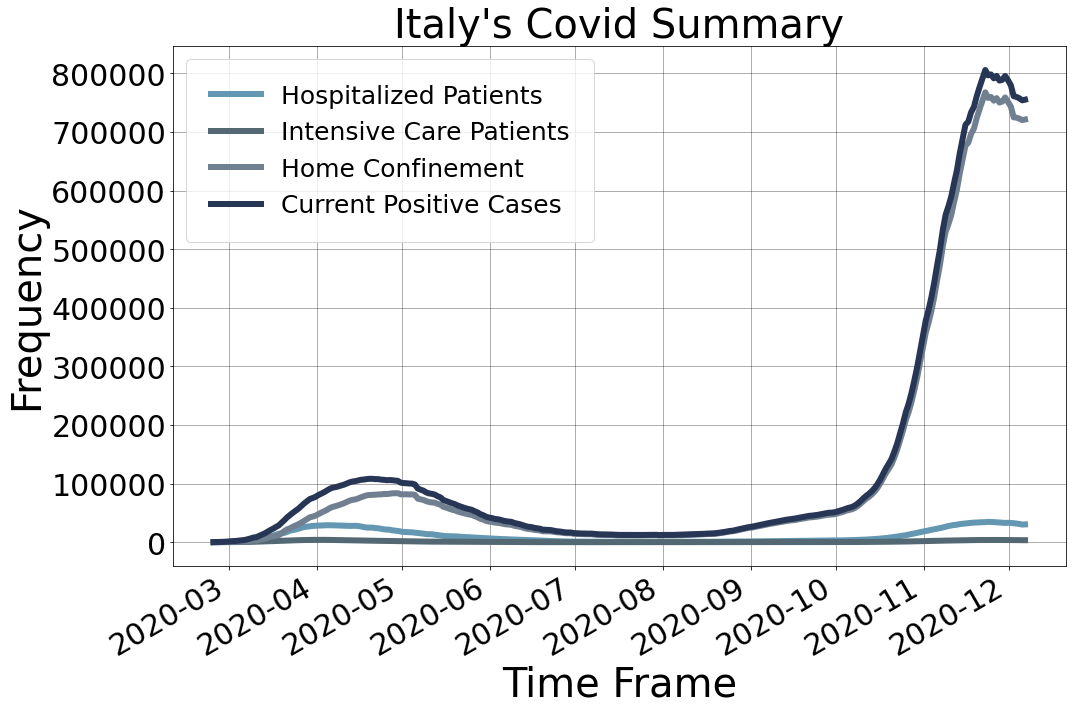

In [69]:
# We plot the timeseries summary of Covid-19 Summary
ita_time['HospitalizedPatients'].plot(kind='line',label='Hospitalized Patients',linewidth=6,color='#6497b1')
ita_time['IntensiveCarePatients'].plot(kind='line',label='Intensive Care Patients',linewidth=6,color='#536872')
ita_time['HomeConfinement'].plot(kind='line',label='Home Confinement',linewidth=6,color='#708090')
ita_time['CurrentPositiveCases'].plot(kind='line',label='Current Positive Cases',linewidth=6,color='#283655')
plt.xlabel('Time Frame',fontsize=40, color='black',)
plt.ylabel('Frequency',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Italy's Covid Summary",fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()

><p style='font-size:25px'>Italy went into a late lockdown which seemed to work for them as the cases were controlled after the early rise. It was untill late in 2020 where the cases rose rapidly.</p>

<p style='font-size:25px'>After a brief analysis above we move into time series forecasting where we will predict the total positive cases for the next 15 days. The function <b>split_sequence</b> is taken from Jason Brownlee's book <a href=https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/>Introduction to Timeseries Forecasting With Python.</a> </p>

In [70]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if(out_end_ix > len(sequence)):
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [71]:
# Our target Variable will be Total Positive Cases 
test=ita_time['TotalPositiveCases']

In [72]:
# We take the last 15 days as historical data and we will predict the next 15 days cases. Hence the shape is 15 fr X and Y
X,y=split_sequence(test,15,15)

In [73]:
X.shape

(258, 15)

In [74]:
Y=y[257]

In [76]:
# Creating Multi Layer Perceptron
inputs=tf.keras.Input(shape=(15))
x=tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001))(inputs)
x=tf.keras.layers.Dense(100,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.00001))(x)
outputs=tf.keras.layers.Dense(15)(x)

In [77]:
# We take Compile our Model
model=tf.keras.Model(inputs,outputs)
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [78]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1600      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 15)                1515      
Total params: 13,215
Trainable params: 13,215
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Saving Our models Data 
history=model.fit(X,y,epochs=500,verbose=0,validation_split=0.2)

2021-11-05 09:21:25.780751: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


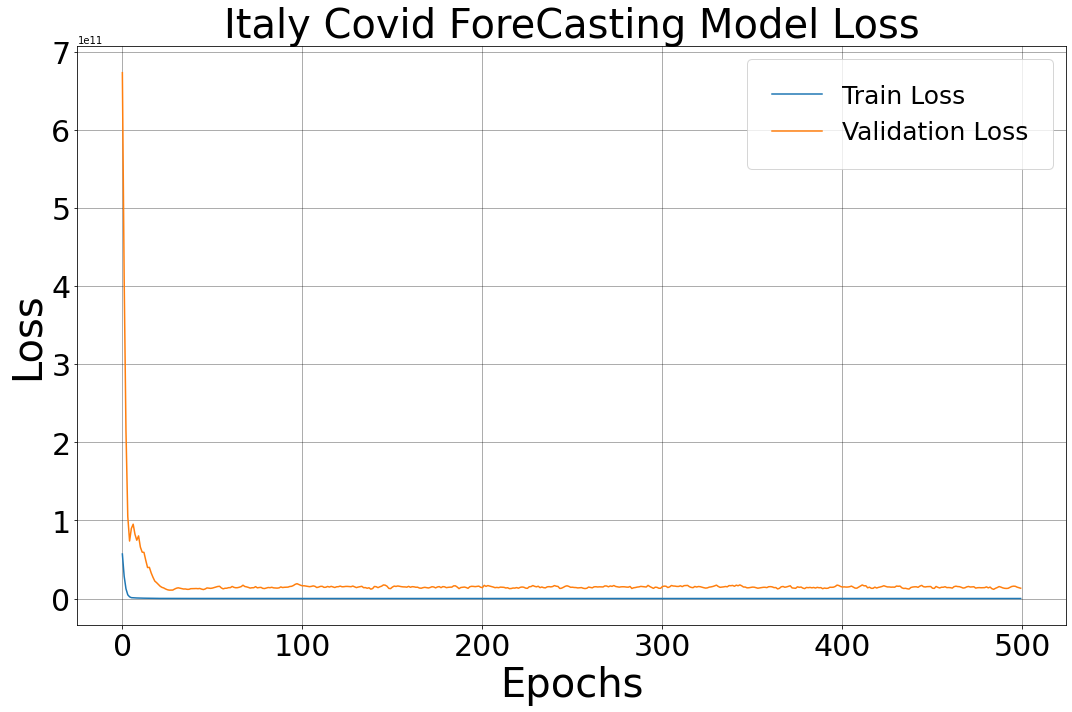

In [80]:
#Plotting the Loss 
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs',fontsize=40, color='black',)
plt.ylabel('Loss',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True,color='black',alpha=0.4)
plt.title("Italy Covid ForeCasting Model Loss",fontsize=40, color='black')
plt.legend(loc=1,borderpad=1,fontsize=25)
plt.tight_layout()

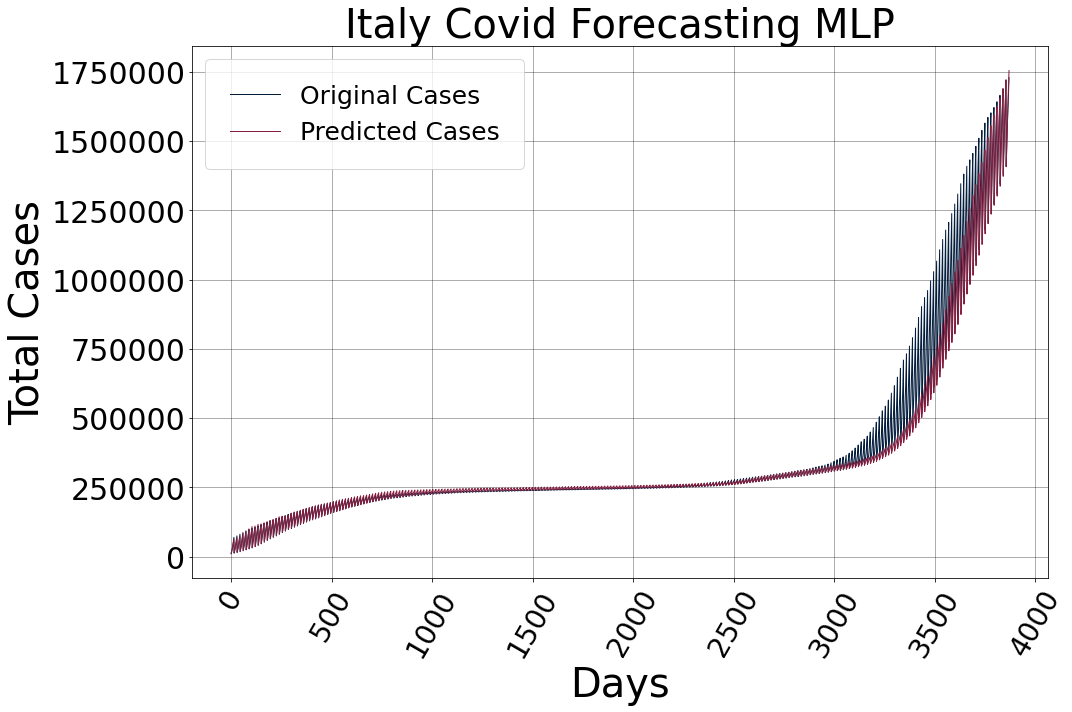

In [81]:
#Our loss did convergedand if we see the predictions they are pretty close to the originial one's
preds=model.predict(X).flatten()
y_plot=y.flatten()
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(y_plot,label='Original Cases', color='#051e3e',linewidth=1)
plt.plot(preds,label='Predicted Cases', color='#851e3e',linewidth=1)
plt.xlabel('Days',fontsize=40, color='black',)
plt.ylabel('Total Cases',fontsize=40, color='black')
plt.xticks(fontsize=28,rotation=60)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Italy Covid Forecasting MLP",fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()


><p style='font-size:25px'>Our Multilayer Perceptron worked well as a timeseries model but here we have only developed our model and we forecast on data later, Linear and Polynomial Models were also developed but MSE for both of them were considerably higher than the Multilayer Perceptron</p>

The MSE from our Linear Regression Model is 31736812473.774105


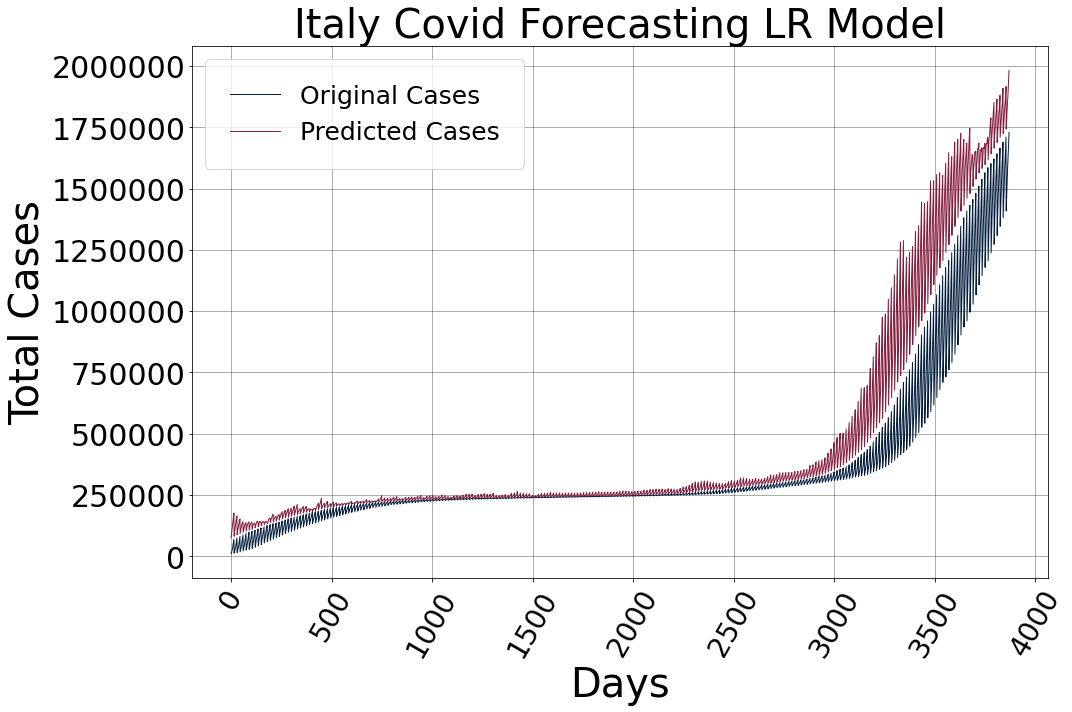

In [82]:
#Developing Linear Model
lr=LinearRegression()
modelLR=lr.fit(X,y)
y_LR=modelLR.predict(y)
mse=((y.flatten()-y_LR.flatten())**2).mean()
print(f'The MSE from our Linear Regression Model is {mse}')
y_plot=y.flatten()

#Plotting the Predictions
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(y_plot,label='Original Cases', color='#051e3e',linewidth=1)
plt.plot(y_LR.flatten(),label='Predicted Cases', color='#851e3e',linewidth=1)
# plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Days',fontsize=40, color='black',)
plt.ylabel('Total Cases',fontsize=40, color='black')
plt.xticks(fontsize=28,rotation=60)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Italy Covid Forecasting LR Model",fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()


Text(0.5, 1.0, 'MSE VS Degree')

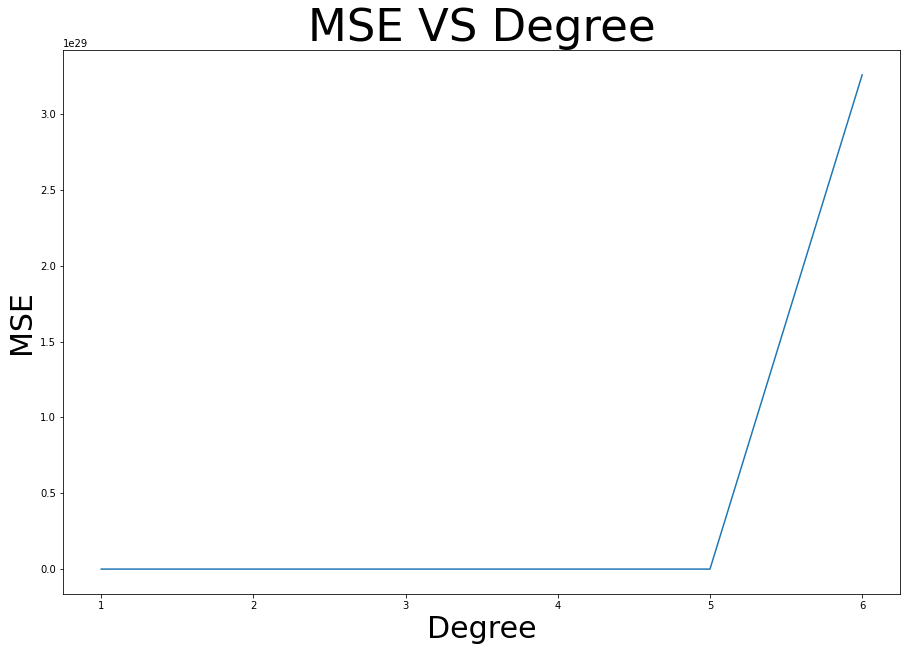

In [83]:
#Building Polynomial Model 
maxdegree=7 # The maximum degree we would like to test
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(X)
    lr=LinearRegression(fit_intercept=False)
    model_log=lr.fit(x_poly_train,y)
    y_train_pred=model_log.predict(x_poly_train)
    mse_train=mean_squared_error(y,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
fig,ax=plt.subplots(figsize=(15,10))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Degree',fontsize=30)
ax.set_ylabel('MSE',fontsize=30)
ax.set_title('MSE VS Degree',fontsize=45)

><p style='font-size:25px'>The error is in the range of 1e29. That's something to move on from. Hence our MLP performed the best for Time Series forecasting and hence we will use this model for our predictions for the next 15 days.</p>

In [84]:
# We create Date Labels,for the next 15 days 
date_labels=[]
style='2020-12'
for i in range(13,28):
    date_labels.append(f'{style}-{i}')

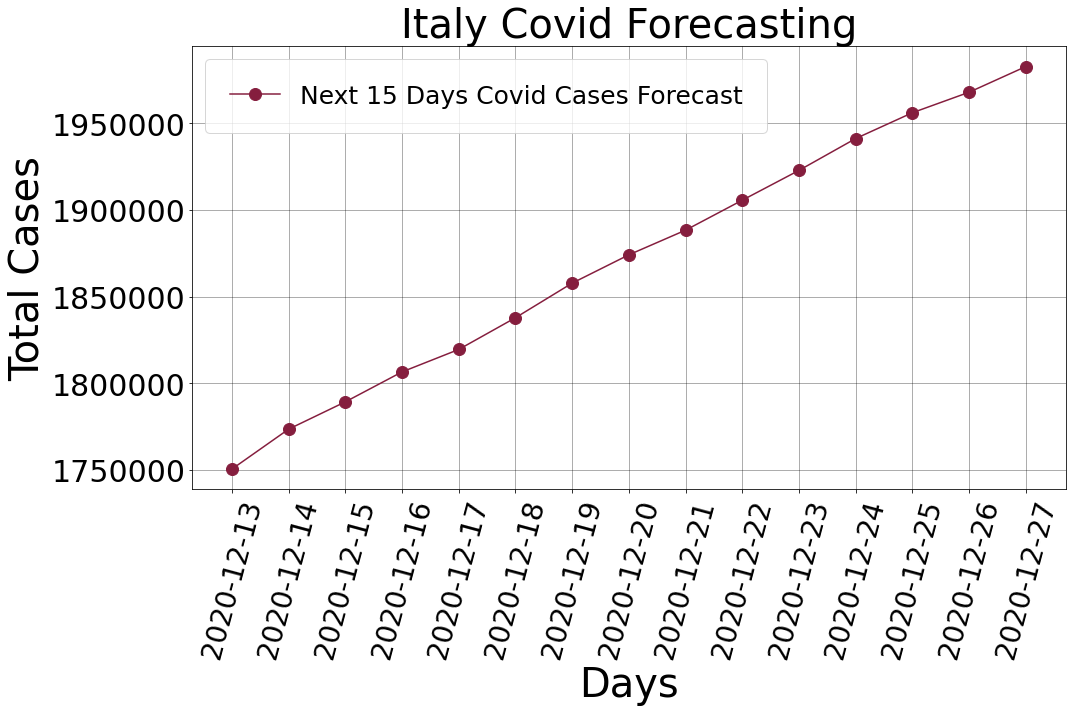

In [85]:
# The predictions for the next 15 days are 
next_15_days=model.predict(Y.reshape(1,15))
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(date_labels,next_15_days.flatten(),label='Next 15 Days Covid Cases Forecast', color='#851e3e',marker='o',markersize=12)
plt.xlabel('Days',fontsize=40, color='black',)
plt.ylabel('Total Cases',fontsize=40, color='black')
plt.xticks(fontsize=28,rotation=75)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Italy Covid Forecasting",fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()


<h2 style = "background:black;border:0;height:55px;width:380px;padding-top:5px;color:white;font-size:45px;padding-left:7px">1.3 South Korea</h2>

In [86]:
pathKor='/kaggle/input/coronavirusdataset/'

<p style='font-size:20px'>A country of rich culture, South Korea, went through the same phase of Covid, they Adopted the policy of contact tracing and the dataset here conatins the timeseries as well as patient Information.</p>

In [87]:
case=pd.read_csv(f'{pathKor}Case.csv',parse_dates=True)
patientInfo=pd.read_csv(f'{pathKor}PatientInfo.csv',parse_dates=True)
policy=pd.read_csv(f'{pathKor}Policy.csv',parse_dates=True)
region=pd.read_csv(f'{pathKor}Region.csv',parse_dates=True)
searchTrend=pd.read_csv(f'{pathKor}SearchTrend.csv',parse_dates=True)
seoulFloating=pd.read_csv(f'{pathKor}SeoulFloating.csv',parse_dates=True)
time=pd.read_csv(f'{pathKor}SeoulFloating.csv',parse_dates=True)

In [88]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [89]:
patientInfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [90]:
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [91]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [92]:
# A peek into the data set Search Trend which is the data of tests finding from 2016 to present of different viral disease. 
searchTrend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


In [93]:
seoulFloating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


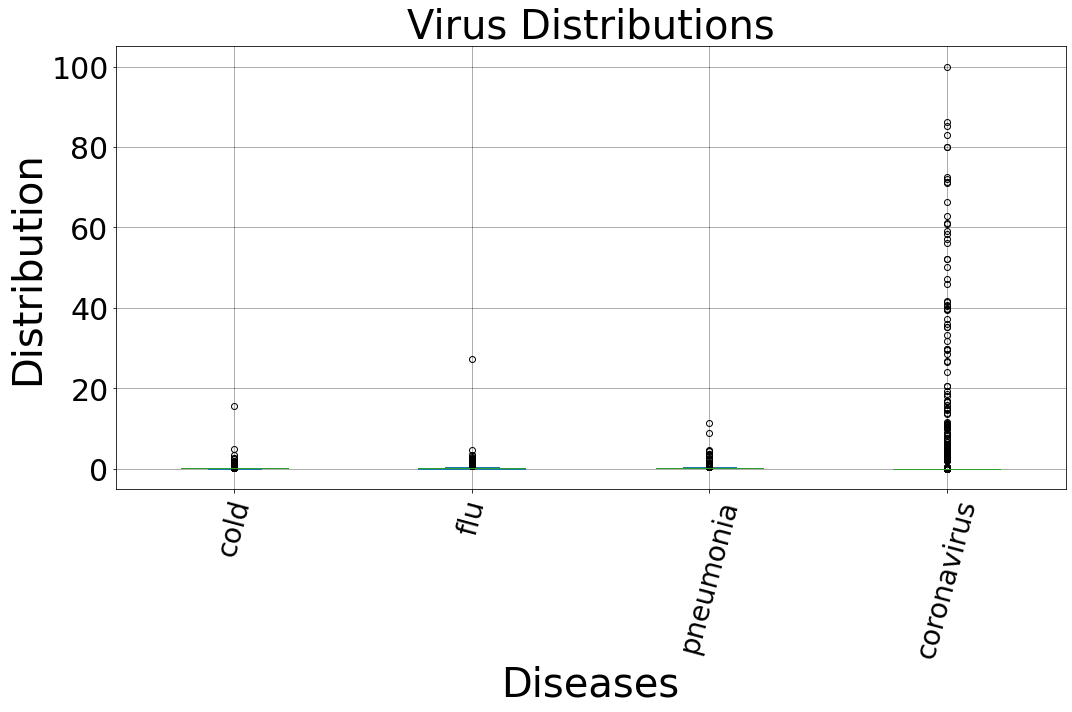

In [94]:
# searchTrend Visualization
searchTrend.plot(kind='box')
plt.xlabel('Diseases',fontsize=40, color='black',)
plt.ylabel('Distribution',fontsize=40, color='black')
plt.xticks(fontsize=28,rotation=75)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Virus Distributions",fontsize=40, color='black')
# plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()

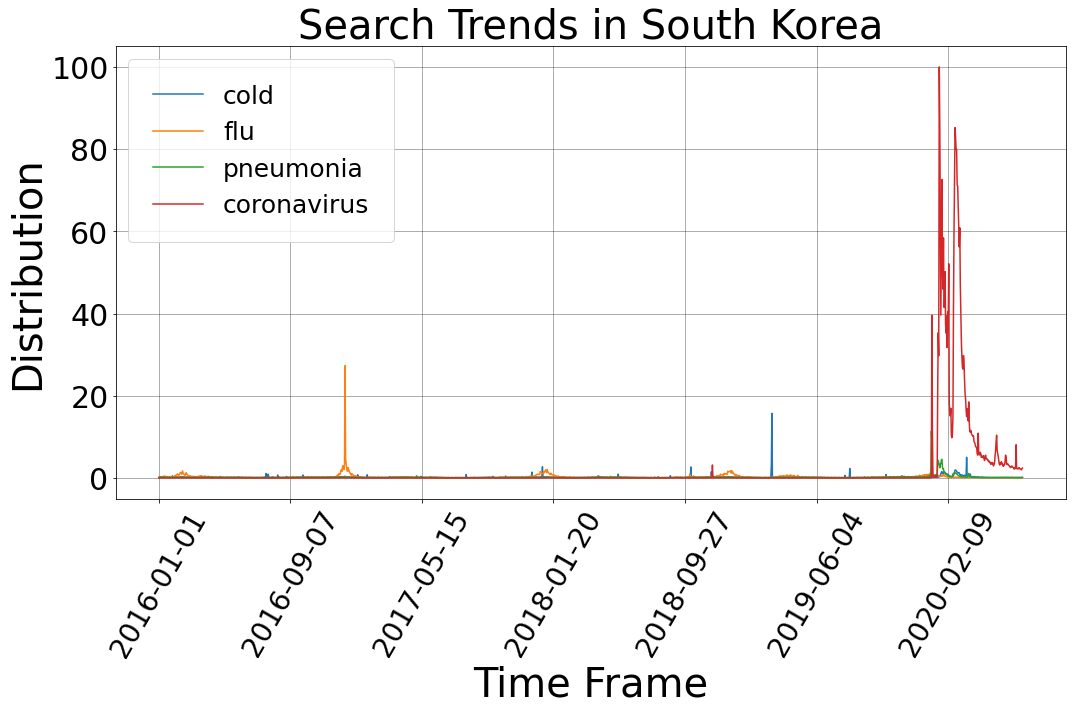

In [95]:
searchTrend.plot(x='date',kind='line')
plt.xlabel('Time Frame',fontsize=40, color='black',)
plt.ylabel('Distribution',fontsize=40, color='black')
plt.xticks(fontsize=28,rotation=60)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Search Trends in South Korea",fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()

><p style='font-size:25px'>The box plot in the first visual, shows how the other viral diseases having low outliers are behaving normally but the Corona virus outbreak is evident and the evidence continues in the following time series plot.</p>

<p style='font-size:20px'>Moving on to explore Patient info data dataset where we first clean the data set and then procees further.</p>

In [96]:
patientInfo.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [97]:
# We see the NAn values and lets take a deeper look
patientInfo.isna().sum()

patient_id               0
sex                   1122
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date    4475
confirmed_date           3
released_date         3578
deceased_date         5099
state                    0
dtype: int64

In [98]:
# Starting filling Nan Values in our data w
dummy_date='2016-02-04'
patientInfo['confirmed_date'].fillna(dummy_date,inplace=True)

In [99]:
patientInfo['released_date'].fillna(dummy_date,inplace=True)
patientInfo['deceased_date'].fillna(dummy_date,inplace=True)

In [100]:
patientInfo['symptom_onset_date'].fillna(dummy_date,inplace=True)

In [101]:
# We choose genders randomly to fill null values giving them equal probability for each gender
replacement = np.random.choice(['male', 'female'], p=[.5, .5], size=1122)
nan=patientInfo['sex'].isna()
patientInfo.loc[nan,'sex']=replacement

In [102]:
patientInfo.isna().sum()

patient_id               0
sex                      0
age                   1380
country                  0
province                 0
city                    94
infection_case         919
infected_by           3819
contact_number        4374
symptom_onset_date       0
confirmed_date           0
released_date            0
deceased_date            0
state                    0
dtype: int64

In [103]:
#Filling the string based columns with Ubknown UK and integers with 0
patientInfo.age.fillna('UK',inplace=True)
patientInfo.city.fillna('UK',inplace=True)
patientInfo.fillna(0,inplace=True)


In [104]:
#Verifying our changes
patientInfo.isna().sum()

patient_id            0
sex                   0
age                   0
country               0
province              0
city                  0
infection_case        0
infected_by           0
contact_number        0
symptom_onset_date    0
confirmed_date        0
released_date         0
deceased_date         0
state                 0
dtype: int64

In [105]:
# We'll see corona virus cases distribution by age 
ageDistribution=patientInfo.groupby('age').count()['patient_id'].drop('UK').reset_index()

In [106]:
ageDistribution.head()

,age,patient_id
0,0s,66
1,100s,1
2,10s,178
3,20s,899
4,30s,523


In [107]:
ageDistribution.set_index('age',inplace=True)

In [108]:
ageDistribution.drop('100s',inplace=True)

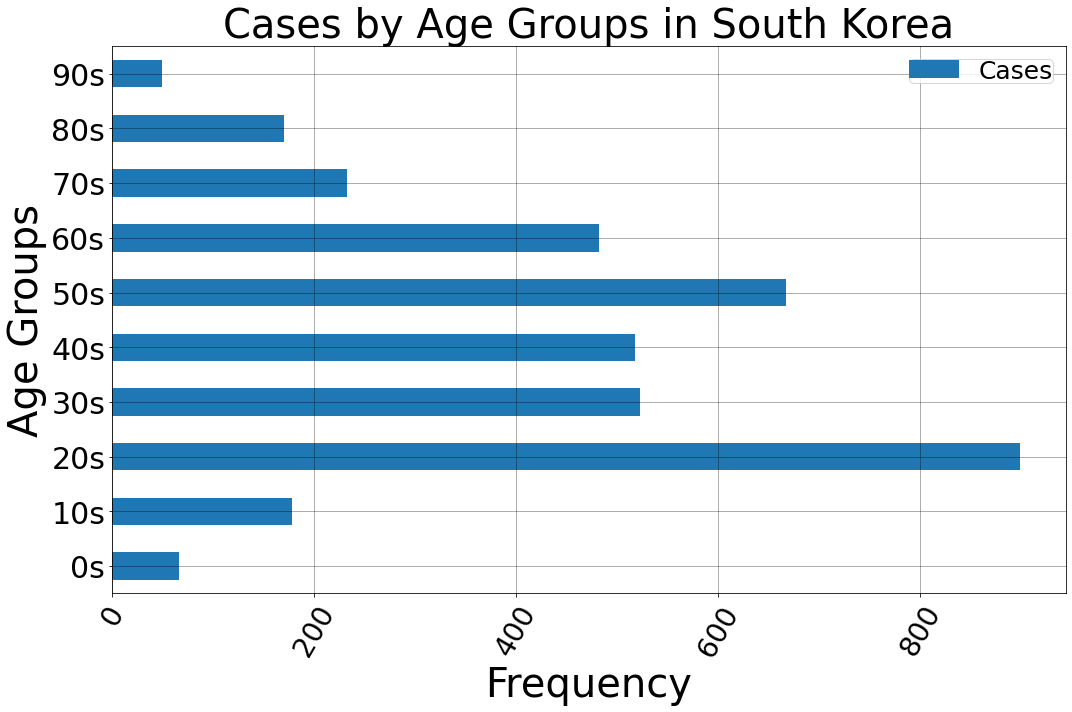

In [109]:
# South Korea Cases By Age
ageDistribution.plot(kind='barh')
plt.xlabel('Frequency',fontsize=40, color='black',)
plt.ylabel('Age Groups',fontsize=40, color='black')
plt.xticks(fontsize=28,rotation=60)
plt.yticks(fontsize=30)
plt.grid(True,color='black',alpha=0.4)
plt.title("Cases by Age Groups in South Korea",fontsize=40, color='black')
plt.legend(loc=1,borderpad=0,fontsize=25,labels=['Cases'])
plt.tight_layout()

In [110]:
#Cases by gender
sexDistribution=patientInfo.groupby('sex').count()['patient_id']

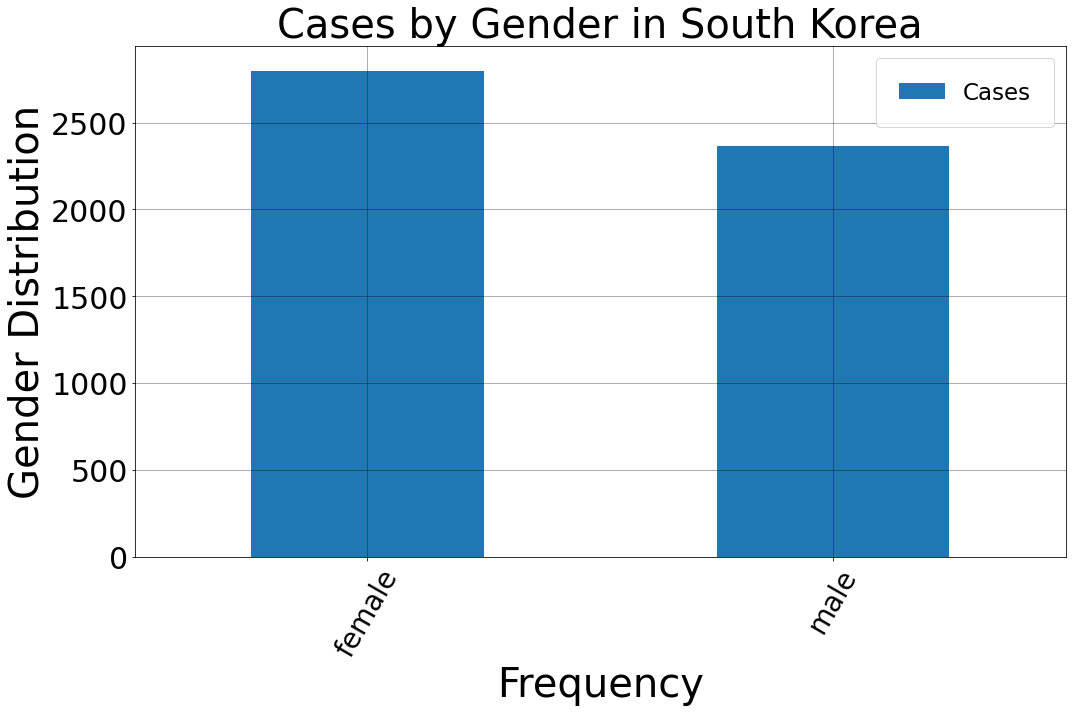

In [111]:
sexDistribution.plot(kind='bar')
plt.xlabel('Frequency',fontsize=40, color='black',)
plt.ylabel('Gender Distribution',fontsize=40, color='black')
plt.xticks(fontsize=28,rotation=60)
plt.yticks(fontsize=30)
plt.grid(True,color='black',alpha=0.4)
plt.title("Cases by Gender in South Korea",fontsize=40, color='black')
plt.legend(loc=0,borderpad=1,fontsize=23,labels=['Cases'])
plt.tight_layout()

In [112]:
# We move on and see the days taken for different kinds of patients and we only consider the recovered patients not the ones deceased
recovered=patientInfo.where((patientInfo['confirmed_date']!=dummy_date) & (patientInfo['released_date']!=dummy_date) & (patientInfo['deceased_date']==dummy_date)).dropna()

In [113]:
#We add the column days taken to our dataset 
recovered['days_taken']=(pd.to_datetime(recovered['released_date'])-pd.to_datetime(recovered['confirmed_date']))

In [114]:
#Avergage amount of days taken by each gender
recovered.groupby('sex')['days_taken'].sum()/sexDistribution

sex
female   7 days 22:34:05.016077170
male     7 days 03:45:11.411665257
dtype: timedelta64[ns]

In [115]:
# Average Number of days taken by each age group to recover
recovered.groupby('age')['days_taken'].sum().drop(['UK','100s'])/ageDistribution['patient_id']

age
0s     7 days 01:27:16.363636363
10s    7 days 14:25:37.078651685
20s   10 days 16:23:29.566184649
30s    9 days 08:34:52.543021032
40s   11 days 00:05:33.590733590
50s   10 days 17:46:30.404797601
60s    9 days 15:08:12.946058091
70s   11 days 11:04:08.275862068
80s   12 days 02:15:31.764705882
90s    8 days 05:23:15.918367346
dtype: timedelta64[ns]

<p style='font-size:20px'>We will now see the relationship between elder population ratio and total number of cases and we will visualise this relationship with a map graph.</p>

In [116]:
#Calculating Avergae elderly population ratio for each province
A=region.groupby('province').agg({'elderly_population_ratio':'mean'}).reset_index()

In [117]:
# WE take the total cases for each province
B=case.groupby('province').agg({'confirmed':'sum'}).reset_index()

In [118]:
# Merging the data sets into one 
C=A.merge(B)

In [119]:
# We extratct the coordinates for each province
coord=case.drop_duplicates(subset=['province'])[['province','latitude','longitude']].set_index('province')

In [120]:
#Fill the missing ones
coord.loc['Incheon']=[37.4563,126.7052]
coord.loc['Daejeon']=[36.3504,127.3845]
coord.loc['Ulsan']=[35.5384,129.3114]
coord.loc['Gangwon-do']=[37.8228,128.1555]
coord.loc['Jeollabuk-do']=[35.7175,127.1530]
coord.loc['Gyeongsangbuk-do']=[36.4919,128.8889]
coord.loc['Gyeongsangnam-do']=[35.4606,128.2132]
coord.loc['Jeju-do']=[33.4890,126.4983]

In [121]:
#Reset the index so that province becomes a column
coord.reset_index(inplace=True)

In [122]:
#Concatinating the Coordinates and The Aggregated Dataset C
D=C.merge(coord)

In [123]:
#taking a peek to the final dataset
D.head()

,province,elderly_population_ratio,confirmed,latitude,longitude
0,Busan,19.357647,156,35.21628,129.0771
1,Chungcheongbuk-do,23.192500,60,36.82422,127.9552
2,Chungcheongnam-do,23.844375,158,36.81503,127.1139
3,Daegu,17.031111,6680,35.84008,128.5667
4,Daejeon,14.376667,131,36.3504,127.3845


In [124]:
#Longitude and Latitude are converted to floats for plotting
D['latitude']=D['latitude'].astype('float')
D['longitude']=D['longitude'].astype('float')

In [125]:
fig2 = px.scatter_mapbox(D, hover_name='province', lat="latitude", lon="longitude", size="confirmed", color="elderly_population_ratio",color_continuous_scale=px.colors.sequential.Plasma_r, size_max=40, zoom=3)
fig2.update_layout(mapbox_style="dark")

<p style='font-size:20px'>In the above map graph, we have considered the buble size as the total confirmed cases and the color is elderely population ratio.</p>

<h2 style = "background:black;border:0;height:55px;width:240px;padding-top:5px;color:white;font-size:45px;padding-left:7px">1.4 Brazil</h2>

In [126]:
pathBrazil='/kaggle/input/corona-virus-brazil/'

<p style='font-size:20px'>The place where footballing legends like Pele and Ronaldinho were born, Brazil is no stranger to the devil Covid-19. The datasets here provide city coordinate, timeseries data and state wise data.</p>

In [127]:
brazilCovid=pd.read_csv(f'{pathBrazil}brazil_covid19.csv',parse_dates=True)
brazilCovidCities=pd.read_csv(f'{pathBrazil}brazil_covid19_cities.csv',parse_dates=True)
brazilCityCoord=pd.read_csv(f'{pathBrazil}brazil_cities_coordinates.csv',parse_dates=True)
brazilCovidMacro=pd.read_csv(f'{pathBrazil}brazil_covid19_macro.csv',parse_dates=True)

In [128]:
#Checking for null values
brazilCovidCities.isna().sum()

date      0
state     0
name      0
code      0
cases     0
deaths    0
dtype: int64

In [129]:
brazilCovid.isna().sum()

date      0
region    0
state     0
cases     0
deaths    0
dtype: int64

In [130]:
#Transforming Data for time series
time_brazil=brazilCovid.set_index('date')

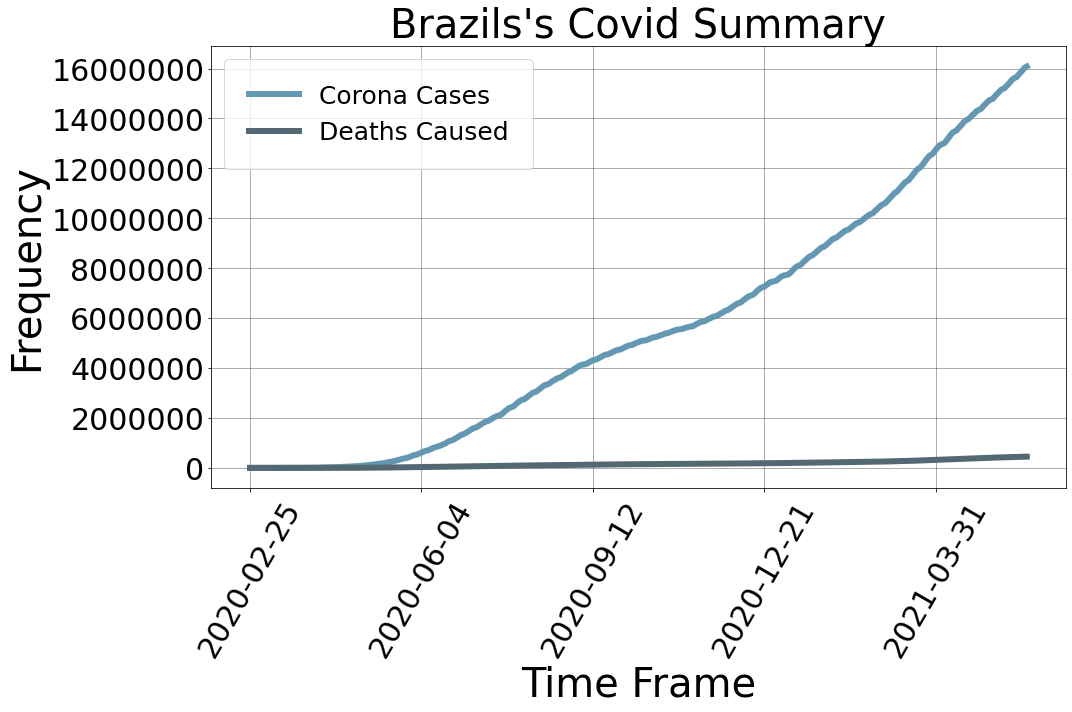

In [131]:
#Time Series COvid Summary
time_brazil1=time_brazil.reset_index().groupby('date').sum()
time_brazil1['cases'].plot(kind='line',label='Corona Cases',linewidth=6,color='#6497b1')
time_brazil1['deaths'].plot(kind='line',label='Deaths Caused',linewidth=6,color='#536872')
plt.xlabel('Time Frame',fontsize=40, color='black',)
plt.ylabel('Frequency',fontsize=40, color='black')
plt.xticks(fontsize=30,rotation=60)
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Brazils's Covid Summary",fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()

In [132]:
#Renaming Columns for merging 
brazilCovidCities.rename(columns={'city_name':'name'},inplace=True)

In [133]:
#Calculating Cases by Cities
cases_by_cities=brazilCovidCities.groupby('name')['cases','deaths'].sum().reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [134]:
cases_by_cities.head()

,name,cases,deaths
0,Abadia de Goiás,236099.0,3200
1,Abadia dos Dourados,50236.0,1137
2,Abadiânia,62460.0,4569
3,Abaetetuba,1542446.0,44258
4,Abaeté,105147.0,2210


In [135]:
#Renaming Columns for merge
brazilCityCoord.rename(columns={'city_name':'name'},inplace=True)

In [136]:
# We merge our dataset to get stats and lat long in 1
lat_long=cases_by_cities.merge(brazilCityCoord,on='name')

In [137]:
fig3 = px.scatter_mapbox(lat_long, hover_name='name', lat="lat", lon="long", size="cases", color="deaths",color_continuous_scale=px.colors.sequential.Plasma_r, size_max=40, zoom=3)
fig3.update_layout(mapbox_style="dark")

<p style='font-size:20px'>In the above map graph, we have considered the buble size as the total confirmed cases and the color is the number of deaths.</p>

In [138]:
#Brazil Timeseries Data 
brazilCovidMacro.head()

,date,country,week,cases,deaths,recovered,monitoring
0,2020-02-25,Brasil,9,0.0,0,NaN,NaN
1,2020-02-26,Brasil,9,1.0,0,NaN,NaN
2,2020-02-27,Brasil,9,1.0,0,NaN,NaN
3,2020-02-28,Brasil,9,1.0,0,NaN,NaN
4,2020-02-29,Brasil,9,2.0,0,NaN,NaN


In [139]:
#Filling Null Values
brazilCovidMacro.fillna(0,inplace=True)
brazilCovidMacro.isna().sum()

date          0
country       0
week          0
cases         0
deaths        0
recovered     0
monitoring    0
dtype: int64

In [140]:
brazilCovidMacro.head()

,date,country,week,cases,deaths,recovered,monitoring
0,2020-02-25,Brasil,9,0.0,0,0.0,0.0
1,2020-02-26,Brasil,9,1.0,0,0.0,0.0
2,2020-02-27,Brasil,9,1.0,0,0.0,0.0
3,2020-02-28,Brasil,9,1.0,0,0.0,0.0
4,2020-02-29,Brasil,9,2.0,0,0.0,0.0


In [141]:
#Creatingg Tick labels for  Time Series graph
tick=['2020-02-05','2020-06-04','2020-09-12','2020-09-12','2021-03-29']

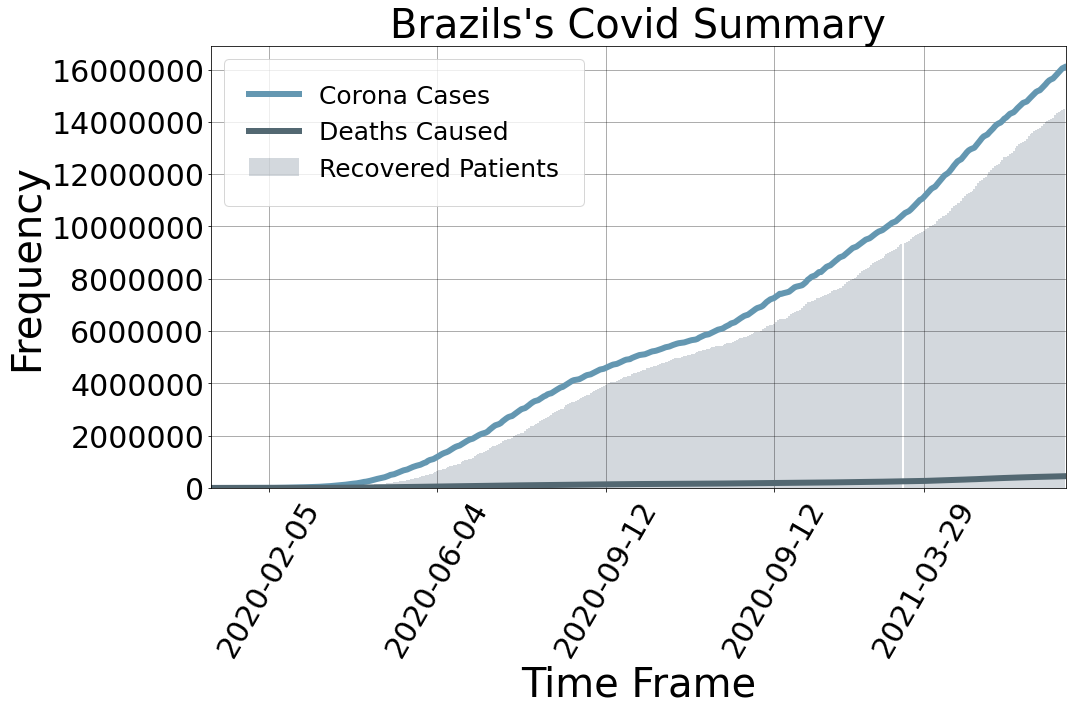

In [142]:
#Time Series Data Ploting
time_brazil2=brazilCovidMacro.set_index('date')
time_brazil2['cases'].plot(kind='line',label='Corona Cases',linewidth=6,color='#6497b1')
time_brazil2['deaths'].plot(kind='line',label='Deaths Caused',linewidth=6,color='#536872')
time_brazil2['recovered'].plot(kind='bar',label='Recovered Patients',width=1,color='#708090',alpha=0.3)
plt.xlabel('Time Frame',fontsize=40, color='black',)
plt.ylabel('Frequency',fontsize=40, color='black')
plt.xticks(fontsize=30,rotation=60,labels=tick,ticks=[30,120,210,300,380])
plt.yticks(fontsize=30)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Brazils's Covid Summary",fontsize=40, color='black')
plt.legend(loc=2,borderpad=1,fontsize=25)
plt.tight_layout()

><p style='font-size:25px'>Brazil cases rose linearly from 2020 to 2021. This is the problem in hand, From the exploration above we will take all the neccessary steps and to prevent this rise in cases.</p>

<h2 style = "background:black;border:0;height:55px;width:340px;padding-top:5px;color:white;font-size:45px;padding-left:7px">1.5 Conclusion</h2>

> <p style='font-size:25px'>The Exploratory Data Analysis that we performed for each country led us to conclude that:.<ui><li style='font-size:25px'>The initial months from Jan'2020 will be key for Brazil.</li><li style='font-size:25px'>A policy that implements lockdowns, close tracking and a vaccination scheme(in the later months as we start from Jan'2020) together will be more efficient.</li><li style='font-size:25px'>As learnt from India, even with vaccination, cases went up. This could have been because there were only 1/4 fully vaccinated people out of 400 million those were vaccinated. The population let alone is 1.3B, that means 300M people are partially vaccinated and 900M have not even recieved a single dose. A vaccination scheme that is fast and have a wider coverage should be thought of.</li><li style='font-size:25px'>Also, Covishield was the major administered vaccine, which appreciates to have a 12 week gap between the 2 shots. Going forward the stratergy should be to opt for a single shot vaccine or a Vaccine that have a shorter time period for the next dose should be considered.</li><!--><li style='font-size:25px'></li></ui></p>

<h1 style = "background:black;border:0;height:65px;width:1400px;padding-top:5px;color:white;font-size:50px;padding-left:7px">2.Developing ML and AI models to predict Deaths in Brazil</h1>

<p style='font-size:20px'>In this section we will develop ML and AI models to predict deaths in Brazil. We will create different models for India and Italy. We will compare all the models developed for a country, the best model selected and will be used for predicting number of deaths in Brazil. We start that by tansforming datasets and taking similar features: Cured, Deaths and and Confirmed cases. We also add two new features from the existing features; Curing Rate and Mortality Rate. Curing Rate is Cured Cases by the Total number of case and likewise Mortality rate can be deduced for each day. We have three sub sections here as Indian Models, Italian Models and Predictions. Here We Go!! </p>

<h2 style = "background:black;border:0;height:55px;width:390px;padding-top:5px;color:white;font-size:45px;padding-left:7px">2.1 Indian Models</h2>

In [143]:
#Transforming Datasets
Indian=ind.groupby('Date').agg({'Cured':'sum','Deaths':'sum','Confirmed':'sum'})

In [144]:
#Italian Dataset is processed  as well
Italian=ita_region.groupby('Date').agg({'Recovered':'sum','Deaths':'sum','TotalPositiveCases':'sum'})

In [145]:
#Columns Renaming
Italian.columns=['Cured','Deaths','Confirmed']

In [146]:
#Adding Mortality Rate Feature
def MR(df):
    df['MR']=np.round(df['Deaths']/df['Confirmed'],5)
    return df

In [147]:
Indian=MR(Indian)
Italian=MR(Italian)

In [148]:
#Curing Rate
def CR(df):
    df['CR']=np.round(df['Cured']/df['Confirmed'],5)
    return df
    

In [149]:
Indian=CR(Indian)
Italian=CR(Italian)

In [150]:
Indian.head()

,Cured,Deaths,Confirmed,MR,CR
Date,,,,,
2020-01-30,0,0,1,0.0,0.0
2020-01-31,0,0,1,0.0,0.0
2020-02-01,0,0,2,0.0,0.0
2020-02-02,0,0,3,0.0,0.0
2020-02-03,0,0,3,0.0,0.0


In [151]:
#TO store MSE of all the models
mseIndian={}
mseItalian={}

## Linear Regression Model

In [152]:
#Common Function to generate lr model
def lrModel(x_train,y_train):
    lr=LinearRegression()
    model=lr.fit(x_train,y_train)
    return model
    

In [153]:
#Indian Predictors and Response
X_Indian=Indian.drop('Deaths',axis=1).values
y_Indian=Indian['Deaths'].values

In [154]:
#Normalizing the data
norm_Indian=Normalizer()
X_Indian_Norm=norm_Indian.fit_transform(X_Indian)

In [155]:
#Simple LR
lr_Indian=lrModel(X_Indian_Norm,y_Indian)
pred=lr_Indian.predict(X_Indian_Norm)
mse=mean_squared_error(y_Indian,pred)
mseIndian['lr']=mse

In [156]:
#Moving Forward We will find the hyperpermaters of the models with GridSearch CV and use the best model 

def best_classifier(clf, params, X,y, n_folds = 5):
    gs = GridSearchCV(clf, param_grid = params, cv=n_folds)
    gs.fit(X,y)
    print("BEST", gs.best_params_, round(gs.best_score_,2))
    best = gs.best_estimator_
    return best

# # This code snapshot for best_classifier function has been taken from <a href=https://www.univ.ai>Univ.ai: The best place to learn Data Science</a>

In [157]:
# RIDGE REGRESSION
best_ridge_Indian=best_classifier(Ridge(),{'alpha':np.linspace(0.1,0.0001,20)},X_Indian_Norm,y_Indian)
pred_ridge=best_ridge_Indian.predict(X_Indian_Norm)

BEST {'alpha': 0.015873684210526318} -518.48


In [158]:
mseIndian['lr_ridge']=mean_squared_error(y_Indian,pred_ridge)

In [159]:
#Lasso Regression
best_lasso_Indian=best_classifier(Lasso(),{'alpha':np.linspace(0.1,0.0001,20),'max_iter':[1000,10000,20000,30000]},X_Indian_Norm,y_Indian)
pred_lasso=best_lasso_Indian.predict(X_Indian_Norm)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2136810609.4121094, tolerance: 672176195.771582

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2370930574.640625, tolerance: 672176195.771582

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2645855143.4467773, tolerance: 672176195.771582

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2971645607.8950195, tolerance: 672176195.7

BEST {'alpha': 0.1, 'max_iter': 1000} -44576.27


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1605851478928.137, tolerance: 672176195.771582



In [160]:
mseIndian['lr_lasso']=mean_squared_error(y_Indian,pred_lasso)

In [161]:
##KNN_REgressor 
best_knn_Indian=best_classifier(KNeighborsRegressor(),{'n_neighbors':[i for i in range(1,20)]},X_Indian_Norm,y_Indian)
pred_knn=best_knn_Indian.predict(X_Indian_Norm)
mseIndian['knn']=mean_squared_error(y_Indian,pred_knn)

BEST {'n_neighbors': 17} -173.72


In [162]:
##Neural Networks

## Layers Configured
inputs=tf.keras.Input(shape=4)
x=tf.keras.layers.Dense(512,activation='swish',kernel_regularizer=tf.keras.regularizers.l2(0.0001))(inputs)
x=tf.keras.layers.Dense(512,activation='swish',kernel_regularizer=tf.keras.regularizers.l1(0.0001))(x)
x=tf.keras.layers.Dense(512,activation='swish',kernel_regularizer=tf.keras.regularizers.l2(0.0001))(x)
x=tf.keras.layers.Dense(512,activation='swish',kernel_regularizer=tf.keras.regularizers.l1(0.0001))(x)
outputs=tf.keras.layers.Dense(1,activation='linear')(x)

## Model Config

model_Indian=tf.keras.Model(inputs,outputs)
model_Indian.compile(optimizer='adam',loss='mse',metrics=['mse'])
model_Indian.summary()

## Model Fitting

history_Indian=model_Indian.fit(X_Indian,y_Indian,epochs=500,validation_split=0.2,verbose=0)





Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2560      
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 791,041
Trainable params: 791,041
Non-trainable params: 0
_____________________________________________________

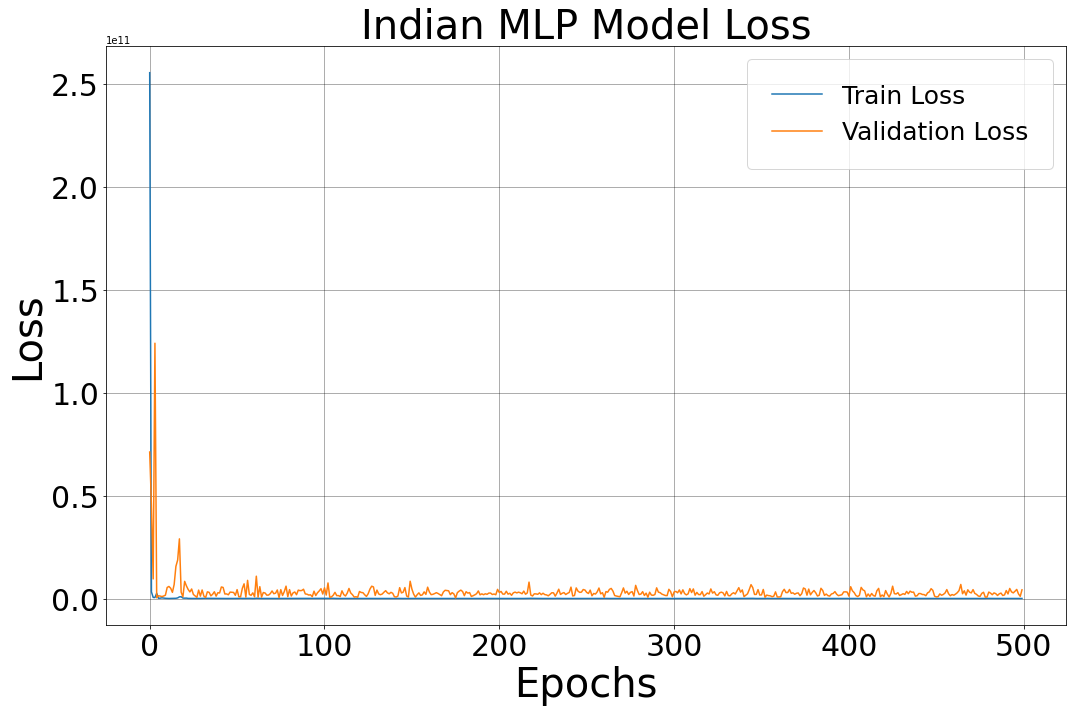

In [163]:
#Loss of our Neural Network
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(history_Indian.history['loss'],label='Train Loss')
plt.plot(history_Indian.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs',fontsize=40, color='black',)
plt.ylabel('Loss',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True,color='black',alpha=0.4)
plt.title("Indian MLP Model Loss",fontsize=40, color='black')
plt.legend(loc=1,borderpad=1,fontsize=25)
plt.tight_layout()

In [164]:
pred_mlp=model_Indian.predict(X_Indian_Norm)
mseIndian['mlp']=mean_squared_error(y_Indian,pred_mlp)

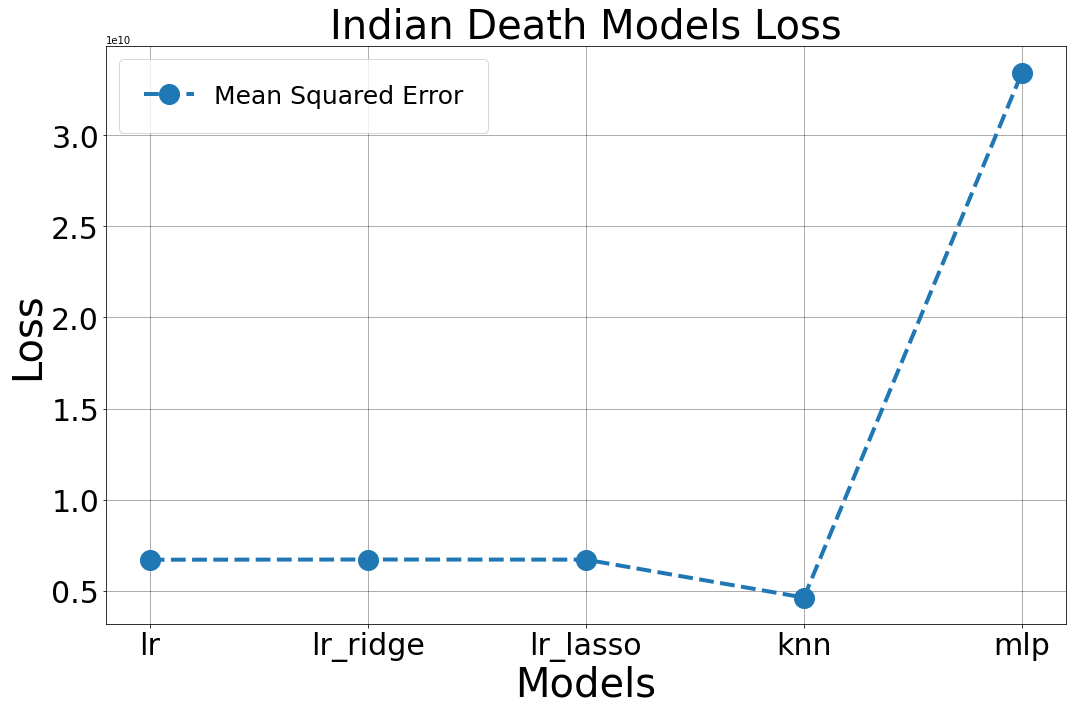

In [165]:
#Loss of each developed Model 
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(mseIndian.keys(),mseIndian.values(),label='Mean Squared Error',linewidth=4,marker='o',linestyle='--',markersize=20)
plt.xlabel('Models',fontsize=40, color='black',)
plt.ylabel('Loss',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True,color='black',alpha=0.4)
plt.title("Indian Death Models Loss",fontsize=40, color='black')
plt.legend(loc=0,borderpad=1,fontsize=25)
plt.tight_layout()

<p style='font-size:20px'>The best Model found is KNN Regressor with the least MSE, Hence we consider it as our best Indian Model.</p>

<h2 style = "background:black;border:0;height:55px;width:400px;padding-top:5px;color:white;font-size:45px;padding-left:7px">2.2 Italian Models</h2>

In [166]:
#Italian Predictors and Response 
X_Italian=Italian.drop('Deaths',axis=1).values
y_Italian=Italian['Deaths'].values

In [167]:
#Normalizing our data 
norm_Italian=Normalizer()
X_Italian_Norm=norm_Italian.fit_transform(X_Italian)

In [168]:
#Simple LR
lr_Italian=lrModel(X_Italian_Norm,y_Italian)
pred=lr_Italian.predict(X_Italian_Norm)
mse=mean_squared_error(y_Italian,pred)
mseItalian['lr']=mse

In [169]:
# RIDGE REGRESSION
best_ridge_Italian=best_classifier(Ridge(),{'alpha':np.linspace(0.1,0.0001,20)},X_Italian_Norm,y_Italian)
pred_ridge=best_ridge_Italian.predict(X_Italian_Norm)

mseItalian['lr_ridge']=mean_squared_error(y_Italian,pred_ridge)

#Lasso Regression
best_lasso_Italian=best_classifier(Lasso(),{'alpha':np.linspace(0.1,0.0001,20),'max_iter':[1000,10000,20000,30000]},X_Italian_Norm,y_Italian)
pred_lasso=best_lasso_Italian.predict(X_Italian_Norm)
mseItalian['lr_lasso']=mean_squared_error(y_Italian,pred_lasso)

##KNN_REgressor 
best_knn_Italian=best_classifier(KNeighborsRegressor(),{'n_neighbors':[i for i in range(1,20)]},X_Italian_Norm,y_Italian)
pred_knn=best_knn_Italian.predict(X_Italian_Norm)
mseItalian['knn']=mean_squared_error(y_Italian,pred_knn)


BEST {'alpha': 0.021131578947368418} -11.03


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061883.7852220535, tolerance: 854795.6101912663

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1429376.607243538, tolerance: 854795.6101912663

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2032564.8276510239, tolerance: 854795.6101912663

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 3125774.1958379745, tolerance: 854795.6

BEST {'alpha': 0.1, 'max_iter': 1000} -47.48
BEST {'n_neighbors': 2} -13.23


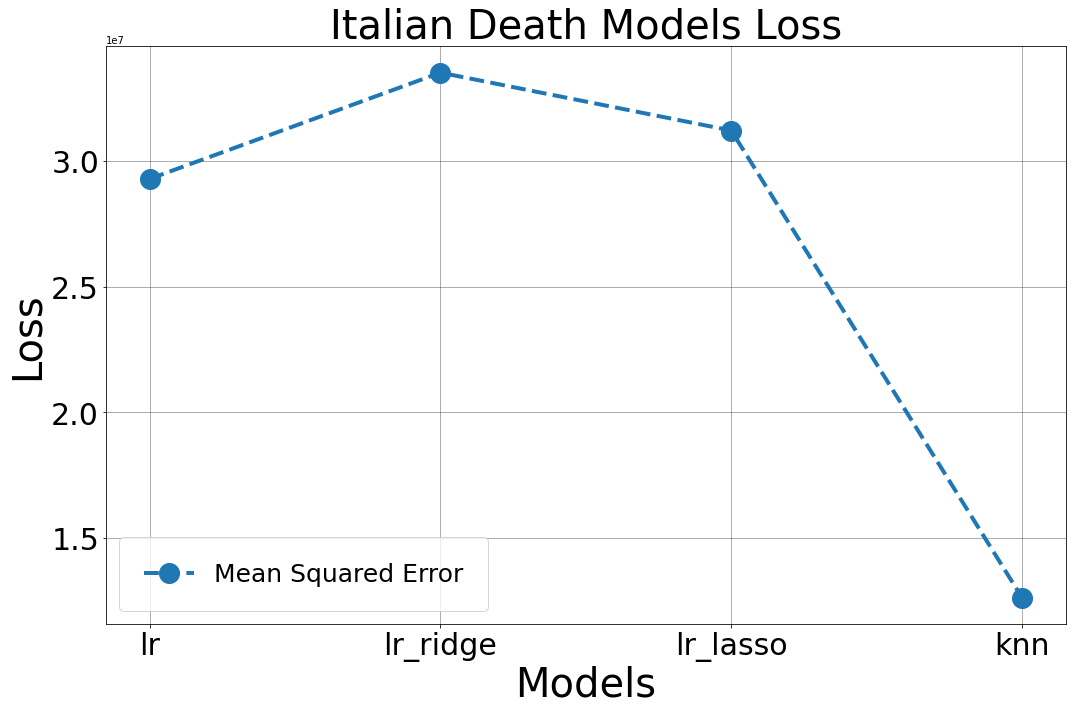

In [170]:
#MSE for all the Models 
fig,ax=plt.subplots(figsize=(15,10))
plt.plot(mseItalian.keys(),mseItalian.values(),label='Mean Squared Error',linewidth=4,marker='o',linestyle='--',markersize=20)
# plt.plot(history_Italian.history['val_loss'],label='Validation Loss')
plt.xlabel('Models',fontsize=40, color='black',)
plt.ylabel('Loss',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.ticklabel_format(style='plain', axis='y')
plt.grid(True,color='black',alpha=0.4)
plt.title("Italian Death Models Loss",fontsize=40, color='black')
plt.legend(loc=0,borderpad=1,fontsize=25)
plt.tight_layout()

<p style='font-size:20px'>The best Model found is KNN Regressor with the least MSE, Hence we consider it as our best Italian Model. We finally have two predictors form India and Italy both KNN Regressors who out performed linear regressors and neural nets. We did not consider neural net in Italy because of a similar performance and higher MSE, hence it is ignored. We move on to the final subsection of our project Predictions.</p>

<h2 style = "background:black;border:0;height:55px;width:390px;padding-top:5px;color:white;font-size:45px;padding-left:7px">2.3 Predictions</h2>

<p style='font-size:20px'>To predict, we need a test set and that is the data from Brazil. We process the data set to be structurally similar as the two used above. We'll predict from both of our models and plot our results with the original data.</p>

In [182]:
#Preparing the Dataset
Brazilian=brazilCovidMacro[['cases','deaths','recovered']].copy()
Brazilian.columns=['Confirmed','Deaths','Cured']
Brazilian=MR(Brazilian)
Brazilian=CR(Brazilian)
Brazilian.fillna(0,inplace=True)

In [183]:
#Setting Response 
y_brazil=Brazilian['Deaths']


In [184]:
#Indian Predictions
X_BI=norm_Indian.transform(Brazilian[['Cured','Confirmed', 'MR', 'CR']].values)
y_brazil_Indian=best_knn_Indian.predict(X_BI)

In [185]:
#Italian Prediction
X_BIT=norm_Italian.transform(Brazilian[['Cured','Confirmed', 'MR', 'CR']].values)
y_brazil_Italian=best_knn_Italian.predict(X_BIT)

In [186]:
#Setting Index
index=[i for i in range(len(y_brazil))]

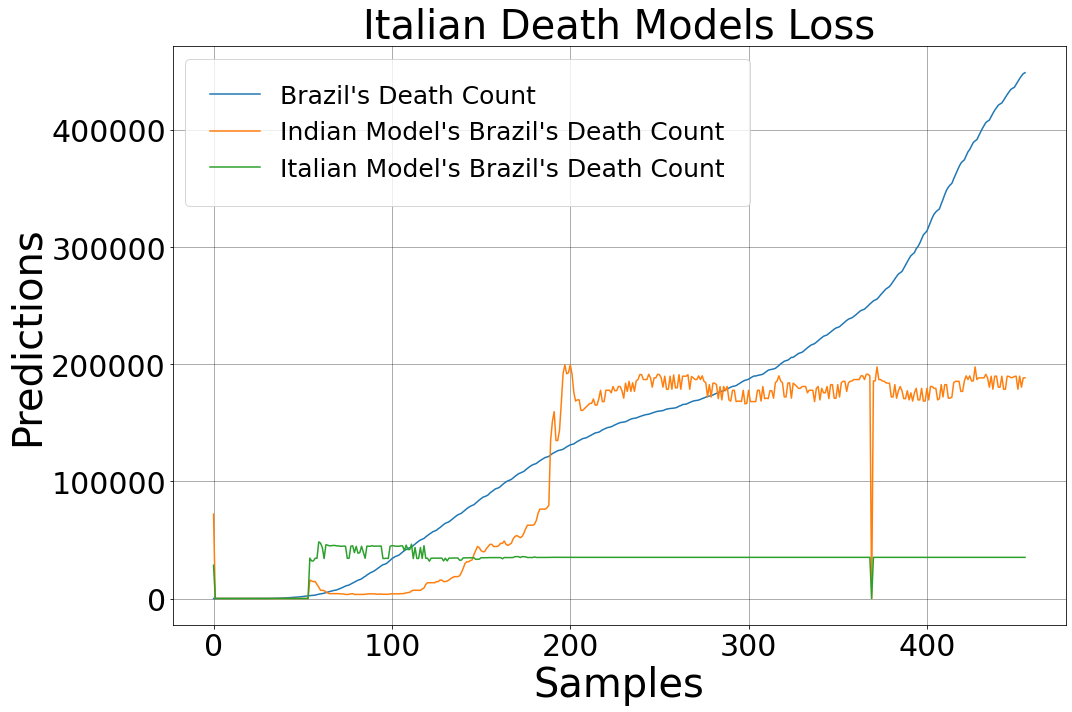

In [187]:
#Final Prediction Plots
plt.plot(index,y_brazil,label="Brazil's Death Count")
plt.plot(index,y_brazil_Indian,label="Indian Model's Brazil's Death Count")
plt.plot(index,y_brazil_Italian,label="Italian Model's Brazil's Death Count")
plt.xlabel('Samples',fontsize=40, color='black',)
plt.ylabel('Predictions',fontsize=40, color='black')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True,color='black',alpha=0.4)
plt.title("Italian Death Models Loss",fontsize=40, color='black')
plt.legend(loc=0,borderpad=1,fontsize=25)
plt.tight_layout()